#Dataset1

In [ ]:
#importing the panads library
#importing the numpy library
#importing the matplot library
#importing the seaborn library
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#loading the data


In [ ]:
df1 = pd.read_csv('NPRI Data for QC.xlsx - NPRI Data for review.csv')

<ipython-input-523-0a5ec179628f>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('NPRI Data for QC.xlsx - NPRI Data for review.csv')


In [ ]:
#colunmn in df1
df1.columns

Index(['NpriID', 'Company name', 'FacilityName', 'NPRI_Report_ReportYear',
       'Quantity', 'Cas', 'Detail_NPRI_SubstanceInfo_NameEn', 'Group',
       'Category', 'Latitude', 'Longitude', 'ProvinceEn',
       'Detail_UnitType_NameEn', 'NAICSPrimary', 'NAICSTitleEn',
       'Substance comments by category for 2022',
       'Substance comments for disposals and all media for 2022',
       'Number of employees'],
      dtype='object')

In [ ]:
# remove rows which have nan values in qauntity coulm

df1 = df1[df1['Quantity'].notnull()]


In [ ]:
df1['Detail_UnitType_NameEn'].unique()


array(['tonnes', 'kg', 'g TEQ', 'grams'], dtype=object)

In [ ]:
#converted all into kg
df1.loc[df1['Detail_UnitType_NameEn'] == 'tonnes',[ 'Quantity']] *= 1000
df1.loc[df1['Detail_UnitType_NameEn'] == 'g',[ 'Quantity']] /= 1000
df1.loc[df1['Detail_UnitType_NameEn'] == 'g TEQ',[ 'Quantity']] /= 1000

In [ ]:
#drop unit column

df1 = df1.drop('Detail_UnitType_NameEn', axis=1)

#Dataset 2

In [ ]:
df2 = pd.read_csv('NPRI_Data_2022_unclean.csv')
df2.columns

Index(['IssueID', 'ReportID', 'Priority', 'IssueType', 'ReportYear', 'NpriID',
       'CompanyName', 'FacilityName', 'NAICS', 'Category', 'Sub-Category',
       'Cas', 'SubstanceName', 'Units', 'CurrentYear', 'YearMinus1',
       'YearMinus2', 'YearMinus3', 'YearMinus4', 'PercentChange',
       'DifferenceChange', 'FourYearAvg', 'NAICSSubstanceAvg',
       'NumStandardDeviation', 'StandardDeviation', 'NAICSSubstanceCount',
       'NAICSSubstanceTotal', 'OverallSubstanceTotal', 'NumOfEmployees',
       'SubstanceComments'],
      dtype='object')

In [ ]:
#no of nan values in all columns
df2.isnull().sum()

IssueID                     0
ReportID                    0
Priority                    0
IssueType                   0
ReportYear                  0
NpriID                      0
CompanyName                 0
FacilityName                0
NAICS                       0
Category                    0
Sub-Category             3277
Cas                         0
SubstanceName               0
Units                       0
CurrentYear                 0
YearMinus1                108
YearMinus2               2664
YearMinus3               4156
YearMinus4               5181
PercentChange             110
DifferenceChange            0
FourYearAvg                77
NAICSSubstanceAvg           0
NumStandardDeviation      781
StandardDeviation           0
NAICSSubstanceCount         0
NAICSSubstanceTotal         0
OverallSubstanceTotal       0
NumOfEmployees              0
SubstanceComments        9963
dtype: int64

In [ ]:
df2 = df2.rename(columns={

'ReportYear':'NPRI_Report_ReportYear',
    'CompanyName': 'Company name',
    'SubstanceName': 'Detail_NPRI_SubstanceInfo_NameEn',
    'NAICS':'NAICSPrimary',
    'NumOfEmployees':'Number of employees',
    'CurrentYear':'Quantity'})

In [ ]:
df2

,IssueID,ReportID,Priority,IssueType,NPRI_Report_ReportYear,NpriID,Company name,FacilityName,NAICSPrimary,Category,...,DifferenceChange,FourYearAvg,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceCount,NAICSSubstanceTotal,OverallSubstanceTotal,Number of employees,SubstanceComments
0,57733,335210,6,Trend,2022,11017,City of Kawartha Lakes,Lindsay WPCP,221320,Water,...,17.1000,24.167500,726.020055,-0.355612,1929.857872,101,73328.025600,81561.568318,5,Nature of activities results in annual variati...
1,57740,335213,6,Trend,2022,10979,City of Owen Sound,Owen Sound WPCP,221320,DisposalsTransfers,...,9.9803,15.924000,106.904767,-0.226340,379.694303,105,11225.000530,33430.126126,6,Nature of treating wastewater changes daily. T...
2,57745,335213,6,Trend,2022,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,...,-8.7418,2.762950,264.082095,-0.312018,846.184135,166,43837.627693,46252.286544,6,Quantities change year to year due to the natu...
3,57746,335213,6,Trend,2022,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,...,-3.9187,1.305175,28.126980,-0.377584,74.431036,149,4190.920093,5418.433552,6,Nature of treating wastewater changes daily. t...
4,57765,335221,6,Trend,2022,24231,Heidelberg Materials Canada Limited,Glacier Quarry,212323,Air,...,3.9710,7.035500,25.332596,-0.220763,78.027725,118,2989.246371,493869.654799,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14813,133645,352761,6,Trend,2022,24303,Obsidian Energy Ltd.,CDN OXY PEMBINA 16-3,211110,VOC_NonStack,...,-0.1428,0.150000,0.275189,-0.243699,1.099672,2934,807.405055,124785.551954,2,NaN
14814,133648,352763,6,Trend,2022,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,211110,Air,...,17.1057,21.152333,10.638948,0.361931,40.780596,5372,57152.430876,297092.019445,2,NaN
14815,133649,352763,6,Trend,2022,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,211110,VOC_NonStack,...,0.1411,0.024750,0.275189,-0.060099,1.099672,2934,807.405055,124785.551954,2,NaN
14816,133654,352766,6,Trend,2022,6066,Windsor Salt Ltd.,Pugwash Mine,212393,Air,...,18.9500,24.405000,41.775216,-0.144624,78.308042,8,334.201730,493869.654799,114,"Previously reported ""road dust"" to include pav..."


In [ ]:
df2['Units'].unique()

array(['tonnes', 'kg', 'g_teq_et', 'grams'], dtype=object)

In [ ]:
df2.loc[df2['Units'] == 'tonnes',[ 'Quantity','YearMinus1','YearMinus2','DifferenceChange','FourYearAvg']] *= 1000
df2.loc[df2['Units'] == 'grams',[ 'Quantity','YearMinus1','YearMinus2','DifferenceChange','FourYearAvg']] /= 1000
df2.loc[df2['Units'] == 'g_teq_et',[ 'Quantity','YearMinus1','YearMinus2','DifferenceChange','FourYearAvg']] /= 1000
df2.drop('Units', axis=1, inplace=True)

#Merging

In [ ]:
df = pd.concat([df1, df2], axis=0)

In [ ]:
df.columns

Index(['NpriID', 'Company name', 'FacilityName', 'NPRI_Report_ReportYear',
       'Quantity', 'Cas', 'Detail_NPRI_SubstanceInfo_NameEn', 'Group',
       'Category', 'Latitude', 'Longitude', 'ProvinceEn', 'NAICSPrimary',
       'NAICSTitleEn', 'Substance comments by category for 2022',
       'Substance comments for disposals and all media for 2022',
       'Number of employees', 'IssueID', 'ReportID', 'Priority', 'IssueType',
       'Sub-Category', 'YearMinus1', 'YearMinus2', 'YearMinus3', 'YearMinus4',
       'PercentChange', 'DifferenceChange', 'FourYearAvg', 'NAICSSubstanceAvg',
       'NumStandardDeviation', 'StandardDeviation', 'NAICSSubstanceCount',
       'NAICSSubstanceTotal', 'OverallSubstanceTotal', 'SubstanceComments'],
      dtype='object')

In [ ]:
# prompt: fill nan 'Substance comments by category for 2022' with empty space

df['Substance comments by category for 2022'].fillna("n", inplace=True)


In [ ]:
# prompt: if in a row the 'Substance comments by category for 2022' has string 'on-site releases to air'
df.loc[df['Substance comments by category for 2022'].str.contains('coal'), 'reduction_Coal'] = 1
df.loc[df['Substance comments by category for 2022'].str.contains('on-site releases to air'), 'reduction'] = "Air releases"
df.loc[df['Substance comments by category for 2022'].str.contains('road dust emissions'), 'reduction'] = "Road dust"
df.loc[df['Substance comments by category for 2022'].str.contains('lower sulfur'), 'reduction'] = "Sulfur"
df.loc[df['Substance comments by category for 2022'].str.contains('Water release emissions decreased'), 'reduction'] = "Water"
df.loc[df['Substance comments by category for 2022'].str.contains('a drop in TPM emissions'), 'reduction'] = "TPM"
df.loc[df['Substance comments by category for 2022'].str.contains('a drop in CO emissions'), 'reduction'] = "CO"
df.loc[df['Substance comments by category for 2022'].str.contains('a drop in PM10 emissions'), 'reduction'] = "PM10"
df.loc[df['Substance comments by category for 2022'].str.contains('drop in PM2.5 emissions'), 'reduction'] = "PM2.5"
df.loc[df['Substance comments by category for 2022'].str.contains('drop in VOC emissions'), 'reduction'] = "VOC"
df.loc[df['Substance comments by category for 2022'].str.contains('drop in NOx emissions'), 'reduction'] = "NOx"
df.loc[df['Substance comments by category for 2022'].str.contains('More coal'), 'reduction'] = "More coal"
df.loc[df['Substance comments by category for 2022'].str.contains('decline in air releases'), 'reduction'] = "air releases"
df.loc[df['Substance comments by category for 2022'].str.contains('Arsenic emissions'), 'reduction'] = "Arsenic"
df.loc[df['Substance comments by category for 2022'].str.contains('lower source of mercury emissions'), 'reduction'] = "Mercury"
df.loc[df['Substance comments by category for 2022'].str.contains('large drop in SO2 emissions'), 'reduction'] = "S02"
df.loc[df['Substance comments by category for 2022'].str.contains('Cadmium emissions'), 'reduction'] = "Cadium"
df.loc[df['Substance comments by category for 2022'].str.contains('reduced the PM2.5, PM10, and TPM'), 'reduction'] = "PM2.5, PM10, and TPM"
df.loc[df['Substance comments by category for 2022'].str.contains('less SO2 emissions'), 'reduction'] = "SO2"
df.loc[df['Substance comments by category for 2022'].str.contains('HCL emissions'), 'reduction']= "HCL"
df.loc[df['Substance comments by category for 2022'].str.contains('HF emissions'), 'reduction'] = "HF"
df.loc[df['Substance comments by category for 2022'].str.contains('Cyanide'), 'reduction'] = "Cyanide"
df.loc[df['Substance comments by category for 2022'].str.contains('hexavalent chromium emissions'), 'reduction'] = "Chromium"

In [ ]:
df

,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Group,Category,Latitude,...,FourYearAvg,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceCount,NAICSSubstanceTotal,OverallSubstanceTotal,SubstanceComments,reduction_Coal,reduction
0,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021,22630.0,NA - M08,Total particulate matter,Releases to Air,Stack / Point,45.869119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2020,16670.0,NA - M08,Total particulate matter,Releases to Air,Stack / Point,45.869119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021,15940.0,630-08-0,Carbon monoxide,Releases to Air,Stack / Point,45.869119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2020,13250.0,630-08-0,Carbon monoxide,Releases to Air,Stack / Point,45.869119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021,12480.0,NA - M09,PM10 - Particulate Matter <= 10 Micrometers,Releases to Air,Stack / Point,45.869119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14813,24303,Obsidian Energy Ltd.,CDN OXY PEMBINA 16-3,2022,7.2,71-43-2,Benzene,NaN,VOC_NonStack,NaN,...,150.00000,0.275189,-0.243699,1.099672,2934.0,807.405055,124785.551954,NaN,NaN,NaN
14814,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,2022,25398.7,NA - M16,Volatile Organic Compounds (Total),NaN,Air,NaN,...,21152.33333,10.638948,0.361931,40.780596,5372.0,57152.430876,297092.019445,NaN,NaN,NaN
14815,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,2022,209.1,71-43-2,Benzene,NaN,VOC_NonStack,NaN,...,24.75000,0.275189,-0.060099,1.099672,2934.0,807.405055,124785.551954,NaN,NaN,NaN
14816,6066,Windsor Salt Ltd.,Pugwash Mine,2022,30450.0,NA - M08,Total particulate matter,NaN,Air,NaN,...,24405.00000,41.775216,-0.144624,78.308042,8.0,334.201730,493869.654799,"Previously reported ""road dust"" to include pav...",NaN,NaN


In [ ]:
# prompt: unique values in reduction

print(df['reduction'].unique())


[nan 'Road dust' 'Water' 'Air releases' 'Sulfur' 'More coal' 'NOx' 'CO'
 'TPM' 'PM10' 'PM2.5' 'VOC' 'air releases' 'Cadium' 'Arsenic' 'Mercury'
 'S02' 'PM2.5, PM10, and TPM' 'SO2' 'HCL' 'HF' 'Cyanide' 'Chromium']


In [ ]:
# prompt: one hot encoding on the reduction column

reduction_dummies = pd.get_dummies(df['reduction'], prefix='reduction')
df = pd.concat([df, reduction_dummies], axis=1)


In [ ]:
df

,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Group,Category,Latitude,...,reduction_PM2.5,"reduction_PM2.5, PM10, and TPM",reduction_Road dust,reduction_S02,reduction_SO2,reduction_Sulfur,reduction_TPM,reduction_VOC,reduction_Water,reduction_air releases
0,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021,22630.0,NA - M08,Total particulate matter,Releases to Air,Stack / Point,45.869119,...,False,False,False,False,False,False,False,False,False,False
1,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2020,16670.0,NA - M08,Total particulate matter,Releases to Air,Stack / Point,45.869119,...,False,False,False,False,False,False,False,False,False,False
2,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021,15940.0,630-08-0,Carbon monoxide,Releases to Air,Stack / Point,45.869119,...,False,False,False,False,False,False,False,False,False,False
3,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2020,13250.0,630-08-0,Carbon monoxide,Releases to Air,Stack / Point,45.869119,...,False,False,False,False,False,False,False,False,False,False
4,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021,12480.0,NA - M09,PM10 - Particulate Matter <= 10 Micrometers,Releases to Air,Stack / Point,45.869119,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14813,24303,Obsidian Energy Ltd.,CDN OXY PEMBINA 16-3,2022,7.2,71-43-2,Benzene,NaN,VOC_NonStack,NaN,...,False,False,False,False,False,False,False,False,False,False
14814,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,2022,25398.7,NA - M16,Volatile Organic Compounds (Total),NaN,Air,NaN,...,False,False,False,False,False,False,False,False,False,False
14815,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,2022,209.1,71-43-2,Benzene,NaN,VOC_NonStack,NaN,...,False,False,False,False,False,False,False,False,False,False
14816,6066,Windsor Salt Ltd.,Pugwash Mine,2022,30450.0,NA - M08,Total particulate matter,NaN,Air,NaN,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# prompt: change true false into 0 amd 1

df = df.replace(True, 1)
df = df.replace(False, 0)


In [ ]:
# prompt: fill coal reduction by 0 na

df['reduction_Coal'].fillna(0, inplace=True)


In [ ]:
# prompt: drop the reduction column

df = df.drop('reduction', axis=1)


In [ ]:
df

,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Group,Category,Latitude,...,reduction_PM2.5,"reduction_PM2.5, PM10, and TPM",reduction_Road dust,reduction_S02,reduction_SO2,reduction_Sulfur,reduction_TPM,reduction_VOC,reduction_Water,reduction_air releases
0,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021,22630.0,NA - M08,Total particulate matter,Releases to Air,Stack / Point,45.869119,...,0,0,0,0,0,0,0,0,0,0
1,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2020,16670.0,NA - M08,Total particulate matter,Releases to Air,Stack / Point,45.869119,...,0,0,0,0,0,0,0,0,0,0
2,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021,15940.0,630-08-0,Carbon monoxide,Releases to Air,Stack / Point,45.869119,...,0,0,0,0,0,0,0,0,0,0
3,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2020,13250.0,630-08-0,Carbon monoxide,Releases to Air,Stack / Point,45.869119,...,0,0,0,0,0,0,0,0,0,0
4,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021,12480.0,NA - M09,PM10 - Particulate Matter <= 10 Micrometers,Releases to Air,Stack / Point,45.869119,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14813,24303,Obsidian Energy Ltd.,CDN OXY PEMBINA 16-3,2022,7.2,71-43-2,Benzene,NaN,VOC_NonStack,NaN,...,0,0,0,0,0,0,0,0,0,0
14814,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,2022,25398.7,NA - M16,Volatile Organic Compounds (Total),NaN,Air,NaN,...,0,0,0,0,0,0,0,0,0,0
14815,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,2022,209.1,71-43-2,Benzene,NaN,VOC_NonStack,NaN,...,0,0,0,0,0,0,0,0,0,0
14816,6066,Windsor Salt Ltd.,Pugwash Mine,2022,30450.0,NA - M08,Total particulate matter,NaN,Air,NaN,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# drop the columns 'Group' 'Latitude', 'Longitude', 'ProvinceEn' 'IssueID', 'ReportID', 'Priority', 'IssueType'as we cant fill the missing values in these

df = df.drop(columns=['Group', 'Latitude', 'Longitude', 'ProvinceEn', 'IssueID', 'ReportID', 'Priority', 'IssueType','Sub-Category','SubstanceComments', 'NAICSSubstanceAvg',
       'NumStandardDeviation', 'StandardDeviation', 'NAICSSubstanceCount',
       'NAICSSubstanceTotal', 'OverallSubstanceTotal', 'SubstanceComments','NAICSTitleEn',
       'Substance comments by category for 2022',
       'Substance comments for disposals and all media for 2022'])


In [ ]:
df.columns

Index(['NpriID', 'Company name', 'FacilityName', 'NPRI_Report_ReportYear',
       'Quantity', 'Cas', 'Detail_NPRI_SubstanceInfo_NameEn', 'Category',
       'NAICSPrimary', 'Number of employees', 'YearMinus1', 'YearMinus2',
       'YearMinus3', 'YearMinus4', 'PercentChange', 'DifferenceChange',
       'FourYearAvg', 'reduction_Coal', 'reduction_Air releases',
       'reduction_Arsenic', 'reduction_CO', 'reduction_Cadium',
       'reduction_Chromium', 'reduction_Cyanide', 'reduction_HCL',
       'reduction_HF', 'reduction_Mercury', 'reduction_More coal',
       'reduction_NOx', 'reduction_PM10', 'reduction_PM2.5',
       'reduction_PM2.5, PM10, and TPM', 'reduction_Road dust',
       'reduction_S02', 'reduction_SO2', 'reduction_Sulfur', 'reduction_TPM',
       'reduction_VOC', 'reduction_Water', 'reduction_air releases'],
      dtype='object')

In [ ]:
df.isnull().sum()

NpriID                                   0
Company name                            10
FacilityName                           165
NPRI_Report_ReportYear                   0
Quantity                                 0
Cas                                      0
Detail_NPRI_SubstanceInfo_NameEn         0
Category                                 0
NAICSPrimary                             0
Number of employees                    578
YearMinus1                          536704
YearMinus2                          539260
YearMinus3                          540752
YearMinus4                          541777
PercentChange                       536706
DifferenceChange                    536596
FourYearAvg                         536673
reduction_Coal                           0
reduction_Air releases                   0
reduction_Arsenic                        0
reduction_CO                             0
reduction_Cadium                         0
reduction_Chromium                       0
reduction_C

In [ ]:
df

,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category,NAICSPrimary,Number of employees,...,reduction_PM2.5,"reduction_PM2.5, PM10, and TPM",reduction_Road dust,reduction_S02,reduction_SO2,reduction_Sulfur,reduction_TPM,reduction_VOC,reduction_Water,reduction_air releases
0,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021,22630.0,NA - M08,Total particulate matter,Stack / Point,321999,170.0,...,0,0,0,0,0,0,0,0,0,0
1,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2020,16670.0,NA - M08,Total particulate matter,Stack / Point,321999,170.0,...,0,0,0,0,0,0,0,0,0,0
2,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021,15940.0,630-08-0,Carbon monoxide,Stack / Point,321999,170.0,...,0,0,0,0,0,0,0,0,0,0
3,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2020,13250.0,630-08-0,Carbon monoxide,Stack / Point,321999,170.0,...,0,0,0,0,0,0,0,0,0,0
4,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021,12480.0,NA - M09,PM10 - Particulate Matter <= 10 Micrometers,Stack / Point,321999,170.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14813,24303,Obsidian Energy Ltd.,CDN OXY PEMBINA 16-3,2022,7.2,71-43-2,Benzene,VOC_NonStack,211110,2.0,...,0,0,0,0,0,0,0,0,0,0
14814,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,2022,25398.7,NA - M16,Volatile Organic Compounds (Total),Air,211110,2.0,...,0,0,0,0,0,0,0,0,0,0
14815,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,2022,209.1,71-43-2,Benzene,VOC_NonStack,211110,2.0,...,0,0,0,0,0,0,0,0,0,0
14816,6066,Windsor Salt Ltd.,Pugwash Mine,2022,30450.0,NA - M08,Total particulate matter,Air,212393,114.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# prompt: remove duplicate rows

df.drop_duplicates(inplace=True)


In [ ]:
df= df.sort_values(by='NPRI_Report_ReportYear')

# Shift quantities from 1 till 5
for lag in range(1, 5):
    column_name = f'YearMinus{lag}'
    # Shift the values and fill NaN values only
    shifted_values = df.groupby(['NpriID', 'NAICSPrimary', 'Detail_NPRI_SubstanceInfo_NameEn', 'Category'])['Quantity'].shift(lag)
    df[column_name] = df[column_name].fillna(shifted_values)

In [ ]:
for lag in range(1, 5):
    column_name = f'Year{lag}'
    df[column_name] = df.groupby(['NpriID', 'NAICSPrimary', 'Detail_NPRI_SubstanceInfo_NameEn', 'Category'])['NPRI_Report_ReportYear'].shift(lag)

In [ ]:
df

,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category,NAICSPrimary,Number of employees,...,reduction_SO2,reduction_Sulfur,reduction_TPM,reduction_VOC,reduction_Water,reduction_air releases,Year1,Year2,Year3,Year4
440826,5871,St. Marys Cement Inc.,St. Marys Cement Plant,2014,54.531,NA - P/H,"PAHs, total unspeciated",Stack / Point,327310,112.0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
179432,27550,Encana Corporation,Deep Panuke,2014,68383.000,NA - M14,Total reduced sulphur (expressed as hydrogen s...,Stack / Point,211113,66.0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
523864,10010,Wesdome Gold Mines Ltd.,Eagle River Mill,2014,16500.000,NA - 06,Copper (and its compounds),Tailings Management,212220,220.0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
377187,20156,Polaris Materials Corporation,Orca Sand and Gravel,2014,35909.000,NA - M08,Total particulate matter,Road dust,212323,48.0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
240820,10387,Hydro One Remote Communities Inc.,Sachigo Diesel Generating Station,2014,720.000,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,Other Non-Point,221112,54.0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478549,8017,The Shaw Group Ltd.,"Shaw Resources Division, Eastern Embers Plant",2022,1879.000,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,Road dust,321999,13.0,...,0,0,0,0,0,0,2021.0,2020.0,2019.0,2018.0
213584,1322,Goodyear Canada Inc.,Goodyear Canada Inc.,2022,3.240,68953-84-4,"1,4-Benzenediamine, N,N'-mixed phenyl and toly...",Stack / Point,326210,700.0,...,0,0,0,0,0,0,2021.0,NaN,NaN,NaN
213587,1322,Goodyear Canada Inc.,Goodyear Canada Inc.,2022,3070.000,108-10-1,Methyl isobutyl ketone,Stack / Point,326210,700.0,...,0,0,0,0,0,0,2021.0,NaN,NaN,NaN
213466,4526,Goodrich Aerospace Canada Ltd.,Collins Aerospace- Oakville,2022,5.390,NA - 11,Nickel (and its compounds),Stack / Point,336410,1100.0,...,0,0,0,0,0,0,2021.0,2020.0,2019.0,2018.0


In [ ]:
#if year1 == NPRI_Report_ReportYear-1

df['Year1'] = df['NPRI_Report_ReportYear'] - df['Year1']
df['Year2'] = df['NPRI_Report_ReportYear'] - df['Year2']
df['Year3'] = df['NPRI_Report_ReportYear'] - df['Year3']
df['Year4'] = df['NPRI_Report_ReportYear'] - df['Year4']



In [ ]:
# mainly focusing on yearminus 1 and year minus 2

df.loc[(df['Year1'] == 0), 'YearMinus1']= np.nan
df.loc[(df['Year2'] == 0), 'YearMinus2']= np.nan
df.loc[(df['Year1'] == 2), 'YearMinus2']= df.loc[(df['Year1'] == 2), 'YearMinus1']
df.loc[(df['Year1'] == 2), 'YearMinus1']=np.nan
df.loc[(df['Year2'] == 1), 'YearMinus1']=df.loc[(df['Year1'] == 1), 'YearMinus2']
df.loc[(df['Year3'] == 1), 'YearMinus1']=df.loc[(df['Year3'] == 1), 'YearMinus3']
df.loc[(df['Year4'] == 1), 'YearMinus2']=df.loc[(df['Year4'] == 1), 'YearMinus4']
df.loc[(df['Year3'] == 2), 'YearMinus2']=df.loc[(df['Year3'] == 2), 'YearMinus3']
df.loc[(df['Year4'] == 2), 'YearMinus2']=df.loc[(df['Year4'] == 2), 'YearMinus4']


In [ ]:
# prompt: NO OF ROWS WHERE YEAR 1 IS 1 AND YEAR 2 IS 2

# Count the number of rows where 'Year1' is 1 and 'Year2' is 2
count = df[(df['Year1'] == 1) & (df['Year2'] == 2)].shape[0]

# Print the count
print(count)


270919


In [ ]:
# drop year1 yaer2 yaer 3 andyaer4 also the yaerminu3 ans year minu4

df.drop(columns=['Year1', 'Year2', 'Year3', 'Year4', 'YearMinus3', 'YearMinus4'], inplace=True)


In [ ]:
df

,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category,NAICSPrimary,Number of employees,...,reduction_PM2.5,"reduction_PM2.5, PM10, and TPM",reduction_Road dust,reduction_S02,reduction_SO2,reduction_Sulfur,reduction_TPM,reduction_VOC,reduction_Water,reduction_air releases
440826,5871,St. Marys Cement Inc.,St. Marys Cement Plant,2014,54.531,NA - P/H,"PAHs, total unspeciated",Stack / Point,327310,112.0,...,0,0,0,0,0,0,0,0,0,0
179432,27550,Encana Corporation,Deep Panuke,2014,68383.000,NA - M14,Total reduced sulphur (expressed as hydrogen s...,Stack / Point,211113,66.0,...,0,0,0,0,0,0,0,0,0,0
523864,10010,Wesdome Gold Mines Ltd.,Eagle River Mill,2014,16500.000,NA - 06,Copper (and its compounds),Tailings Management,212220,220.0,...,0,0,0,0,0,0,0,0,0,0
377187,20156,Polaris Materials Corporation,Orca Sand and Gravel,2014,35909.000,NA - M08,Total particulate matter,Road dust,212323,48.0,...,0,0,0,0,0,0,0,0,0,0
240820,10387,Hydro One Remote Communities Inc.,Sachigo Diesel Generating Station,2014,720.000,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,Other Non-Point,221112,54.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478549,8017,The Shaw Group Ltd.,"Shaw Resources Division, Eastern Embers Plant",2022,1879.000,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,Road dust,321999,13.0,...,0,0,0,0,0,0,0,0,0,0
213584,1322,Goodyear Canada Inc.,Goodyear Canada Inc.,2022,3.240,68953-84-4,"1,4-Benzenediamine, N,N'-mixed phenyl and toly...",Stack / Point,326210,700.0,...,0,0,0,0,0,0,0,0,0,0
213587,1322,Goodyear Canada Inc.,Goodyear Canada Inc.,2022,3070.000,108-10-1,Methyl isobutyl ketone,Stack / Point,326210,700.0,...,0,0,0,0,0,0,0,0,0,0
213466,4526,Goodrich Aerospace Canada Ltd.,Collins Aerospace- Oakville,2022,5.390,NA - 11,Nickel (and its compounds),Stack / Point,336410,1100.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#checking if the values are inputed successfully

# Filter the DataFrame to select rows where 'NpriID' is 28940 and 'Detail_NPRI_SubstanceInfo_NameEn' is 'Total particulate matter'
filtered_df = df[(df['NpriID'] == 28940) & (df['Detail_NPRI_SubstanceInfo_NameEn'] == 'Total particulate matter')]

# Print the filtered DataFrame
filtered_df


,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category,NAICSPrimary,Number of employees,...,reduction_PM2.5,"reduction_PM2.5, PM10, and TPM",reduction_Road dust,reduction_S02,reduction_SO2,reduction_Sulfur,reduction_TPM,reduction_VOC,reduction_Water,reduction_air releases
305798,28940,Les Planchers Mercier (Drummondville) Inc.,Les Planchers Mercier (Drummondville) Inc.,2015,11209.0,NA - M08,Total particulate matter,Stack / Point,321999,160.0,...,0,0,0,0,0,0,0,0,0,0
305787,28940,Les Planchers Mercier (Drummondville) Inc.,Les Planchers Mercier (Drummondville) Inc.,2016,40900.0,NA - M08,Total particulate matter,Stack / Point,321999,165.0,...,0,0,0,0,0,0,0,0,0,0
305786,28940,Les Planchers Mercier (Drummondville) Inc.,Les Planchers Mercier (Drummondville) Inc.,2017,42600.0,NA - M08,Total particulate matter,Stack / Point,321999,170.0,...,0,0,0,0,0,0,0,0,0,0
305785,28940,Les Planchers Mercier (Drummondville) Inc.,Les Planchers Mercier (Drummondville) Inc.,2018,48700.0,NA - M08,Total particulate matter,Stack / Point,321999,170.0,...,0,0,0,0,0,0,0,0,0,0
305790,28940,Les Planchers Mercier (Drummondville) Inc.,Les Planchers Mercier (Drummondville) Inc.,2019,22660.0,NA - M08,Total particulate matter,Stack / Point,321999,170.0,...,0,0,0,0,0,0,0,0,0,0
1,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2020,16670.0,NA - M08,Total particulate matter,Stack / Point,321999,170.0,...,0,0,0,0,0,0,0,0,0,0
0,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021,22630.0,NA - M08,Total particulate matter,Stack / Point,321999,170.0,...,0,0,0,0,0,0,0,0,0,0
305844,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2022,23780.0,NA - M08,Total particulate matter,Stack / Point,321999,170.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

df.isna().sum()

NpriID                                   0
Company name                            10
FacilityName                           165
NPRI_Report_ReportYear                   0
Quantity                                 0
Cas                                      0
Detail_NPRI_SubstanceInfo_NameEn         0
Category                                 0
NAICSPrimary                             0
Number of employees                    578
YearMinus1                          152833
YearMinus2                          238759
PercentChange                       530622
DifferenceChange                    530512
FourYearAvg                         530589
reduction_Coal                           0
reduction_Air releases                   0
reduction_Arsenic                        0
reduction_CO                             0
reduction_Cadium                         0
reduction_Chromium                       0
reduction_Cyanide                        0
reduction_HCL                            0
reduction_H

In [ ]:

print(df[df['YearMinus1'].isna()].shape)
print(df[df['YearMinus2'].isna()].shape)


(152833, 38)
(238759, 38)


In [ ]:
# fill the nan values in year minus 1 by taking average of quantity and year minus2

df['YearMinus1'] = df['YearMinus1'].fillna((df['Quantity'] + df['YearMinus2']) / 2)
df['YearMinus2'] = df['YearMinus2'].fillna((df['Quantity'] + df['YearMinus1']) / 2)

In [ ]:
print(df[df['YearMinus1'].isna()].shape)
print(df[df['YearMinus2'].isna()].shape)


(141781, 38)
(141781, 38)


In [ ]:
df.isna().sum()


NpriID                                   0
Company name                            10
FacilityName                           165
NPRI_Report_ReportYear                   0
Quantity                                 0
Cas                                      0
Detail_NPRI_SubstanceInfo_NameEn         0
Category                                 0
NAICSPrimary                             0
Number of employees                    578
YearMinus1                          141781
YearMinus2                          141781
PercentChange                       530622
DifferenceChange                    530512
FourYearAvg                         530589
reduction_Coal                           0
reduction_Air releases                   0
reduction_Arsenic                        0
reduction_CO                             0
reduction_Cadium                         0
reduction_Chromium                       0
reduction_Cyanide                        0
reduction_HCL                            0
reduction_H

In [ ]:
# fill values in yearminu1 and year minu2 by bfill and f filll from columns quantity year minus 1 and year mins 2

df['YearMinus1'] = df['YearMinus1'].fillna(df['Quantity'])
df['YearMinus2'] = df['YearMinus2'].fillna(df['Quantity'])



In [ ]:
# fill the nan values in facility by company anme

df['FacilityName'] = df['FacilityName'].fillna(df['Company name'])


In [ ]:
#same for compamny anme
df['Company name'] = df['Company name'].fillna(df['FacilityName'])


In [ ]:
#fill the number of employees by average

df['Number of employees'] = df['Number of employees'].fillna(df['Number of employees'].mean())


In [ ]:
# columwise bfill f ill on quntity year minus1 and year miuns2

df[['Quantity', 'YearMinus1', 'YearMinus2']] = df[['Quantity', 'YearMinus1', 'YearMinus2']].fillna(method='bfill')


In [ ]:
# prompt: rename FourYearAvg as ThreeYearAvg and apply formula

# Rename the 'FourYearAvg' column to 'ThreeYearAvg'
df = df.rename(columns={'FourYearAvg': 'ThreeYearAvg'})

# Replace NaN values with zeros
df_filled = df.fillna(0)

# Calculate the count of non-NaN values in each column
non_nan_counts = df_filled[['Quantity', 'YearMinus1', 'YearMinus2']].count(axis=1)

# Calculate the three-year average
df['ThreeYearAvg'] = (df_filled['Quantity'] + df_filled['YearMinus1'] + df_filled['YearMinus2']) / non_nan_counts.replace(0, np.nan)


In [ ]:


# Calculate the difference between the current year's quantity and the previous year's quantity
df['DifferenceChange'] = df['Quantity'] - df['YearMinus1']

# Calculate the percentage change between the current year's quantity and the previous year's quantity
df['PercentChange'] = (df['DifferenceChange'] / df['YearMinus1']) * 100



In [ ]:
# prompt: round the vakues in diffrenece change to nearest number and percent change to nearet 2 decimal places

# Round 'DifferenceChange' to the nearest integer
df['DifferenceChange'] = df['DifferenceChange'].round(0)

# Round 'PercentChange' to two decimal places
df['PercentChange'] = df['PercentChange'].round(2)


In [ ]:
# prompt: if diffrence change ==0 then percentage chnage =0

df.loc[df['DifferenceChange'] == 0, 'PercentChange'] = 0


In [ ]:
# prompt: if year minus 1 is 0 then percent change =0

df.loc[df['YearMinus1'] == 0, 'PercentChange'] = 0


In [ ]:
print("Number of NaN values in the DataFrame:", df.isna().sum().sum())

Number of NaN values in the DataFrame: 0


In [ ]:
print("Number of NaN values in each column:")
print(df.isna().sum())

Number of NaN values in each column:
NpriID                              0
Company name                        0
FacilityName                        0
NPRI_Report_ReportYear              0
Quantity                            0
Cas                                 0
Detail_NPRI_SubstanceInfo_NameEn    0
Category                            0
NAICSPrimary                        0
Number of employees                 0
YearMinus1                          0
YearMinus2                          0
PercentChange                       0
DifferenceChange                    0
ThreeYearAvg                        0
reduction_Coal                      0
reduction_Air releases              0
reduction_Arsenic                   0
reduction_CO                        0
reduction_Cadium                    0
reduction_Chromium                  0
reduction_Cyanide                   0
reduction_HCL                       0
reduction_HF                        0
reduction_Mercury                   0
reduction_Mor

In [ ]:
df

,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category,NAICSPrimary,Number of employees,...,reduction_PM2.5,"reduction_PM2.5, PM10, and TPM",reduction_Road dust,reduction_S02,reduction_SO2,reduction_Sulfur,reduction_TPM,reduction_VOC,reduction_Water,reduction_air releases
440826,5871,St. Marys Cement Inc.,St. Marys Cement Plant,2014,54.531,NA - P/H,"PAHs, total unspeciated",Stack / Point,327310,112.0,...,0,0,0,0,0,0,0,0,0,0
179432,27550,Encana Corporation,Deep Panuke,2014,68383.000,NA - M14,Total reduced sulphur (expressed as hydrogen s...,Stack / Point,211113,66.0,...,0,0,0,0,0,0,0,0,0,0
523864,10010,Wesdome Gold Mines Ltd.,Eagle River Mill,2014,16500.000,NA - 06,Copper (and its compounds),Tailings Management,212220,220.0,...,0,0,0,0,0,0,0,0,0,0
377187,20156,Polaris Materials Corporation,Orca Sand and Gravel,2014,35909.000,NA - M08,Total particulate matter,Road dust,212323,48.0,...,0,0,0,0,0,0,0,0,0,0
240820,10387,Hydro One Remote Communities Inc.,Sachigo Diesel Generating Station,2014,720.000,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,Other Non-Point,221112,54.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478549,8017,The Shaw Group Ltd.,"Shaw Resources Division, Eastern Embers Plant",2022,1879.000,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,Road dust,321999,13.0,...,0,0,0,0,0,0,0,0,0,0
213584,1322,Goodyear Canada Inc.,Goodyear Canada Inc.,2022,3.240,68953-84-4,"1,4-Benzenediamine, N,N'-mixed phenyl and toly...",Stack / Point,326210,700.0,...,0,0,0,0,0,0,0,0,0,0
213587,1322,Goodyear Canada Inc.,Goodyear Canada Inc.,2022,3070.000,108-10-1,Methyl isobutyl ketone,Stack / Point,326210,700.0,...,0,0,0,0,0,0,0,0,0,0
213466,4526,Goodrich Aerospace Canada Ltd.,Collins Aerospace- Oakville,2022,5.390,NA - 11,Nickel (and its compounds),Stack / Point,336410,1100.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(df['NPRI_Report_ReportYear'].unique())

[2014 2015 2016 2017 2018 2019 2020 2021 2022]


#Encoding Year Column

as if we do it by get dummies it gives true false value

In [ ]:
# Assuming df is your DataFrame containing the data
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Create dummy variables manually
for year in years:
    df[f'Year_{year}'] = (df['NPRI_Report_ReportYear'] == year).astype(int)




In [ ]:
df.dtypes

NpriID                                int64
Company name                         object
FacilityName                         object
NPRI_Report_ReportYear                int64
Quantity                            float64
Cas                                  object
Detail_NPRI_SubstanceInfo_NameEn     object
Category                             object
NAICSPrimary                          int64
Number of employees                 float64
YearMinus1                          float64
YearMinus2                          float64
PercentChange                       float64
DifferenceChange                    float64
ThreeYearAvg                        float64
reduction_Coal                      float64
reduction_Air releases                int64
reduction_Arsenic                     int64
reduction_CO                          int64
reduction_Cadium                      int64
reduction_Chromium                    int64
reduction_Cyanide                     int64
reduction_HCL                   

In [ ]:
df


,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category,NAICSPrimary,Number of employees,...,reduction_air releases,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022
440826,5871,St. Marys Cement Inc.,St. Marys Cement Plant,2014,54.531,NA - P/H,"PAHs, total unspeciated",Stack / Point,327310,112.0,...,0,1,0,0,0,0,0,0,0,0
179432,27550,Encana Corporation,Deep Panuke,2014,68383.000,NA - M14,Total reduced sulphur (expressed as hydrogen s...,Stack / Point,211113,66.0,...,0,1,0,0,0,0,0,0,0,0
523864,10010,Wesdome Gold Mines Ltd.,Eagle River Mill,2014,16500.000,NA - 06,Copper (and its compounds),Tailings Management,212220,220.0,...,0,1,0,0,0,0,0,0,0,0
377187,20156,Polaris Materials Corporation,Orca Sand and Gravel,2014,35909.000,NA - M08,Total particulate matter,Road dust,212323,48.0,...,0,1,0,0,0,0,0,0,0,0
240820,10387,Hydro One Remote Communities Inc.,Sachigo Diesel Generating Station,2014,720.000,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,Other Non-Point,221112,54.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478549,8017,The Shaw Group Ltd.,"Shaw Resources Division, Eastern Embers Plant",2022,1879.000,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,Road dust,321999,13.0,...,0,0,0,0,0,0,0,0,0,1
213584,1322,Goodyear Canada Inc.,Goodyear Canada Inc.,2022,3.240,68953-84-4,"1,4-Benzenediamine, N,N'-mixed phenyl and toly...",Stack / Point,326210,700.0,...,0,0,0,0,0,0,0,0,0,1
213587,1322,Goodyear Canada Inc.,Goodyear Canada Inc.,2022,3070.000,108-10-1,Methyl isobutyl ketone,Stack / Point,326210,700.0,...,0,0,0,0,0,0,0,0,0,1
213466,4526,Goodrich Aerospace Canada Ltd.,Collins Aerospace- Oakville,2022,5.390,NA - 11,Nickel (and its compounds),Stack / Point,336410,1100.0,...,0,0,0,0,0,0,0,0,0,1


#Splitting Data and Encoding

In [ ]:
# Filter the training data (years 2014-2021)
train_data = df[(df['Year_2014'] == 1)|(df['Year_2015'] == 1) | (df['Year_2016'] == 1) | (df['Year_2017'] == 1) |
                (df['Year_2018'] == 1) | (df['Year_2019'] == 1) | (df['Year_2020'] == 1) |
                (df['Year_2021'] == 1)]


# Filter the testing data (year 2022)
test_data = df[df['Year_2022'] == 1]

In [ ]:
test_data

,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category,NAICSPrimary,Number of employees,...,reduction_air releases,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022
9785,11602,Hammond Manufacturing Co Ltd.,Edinburgh Road,2022,10382.000,NA - 14,Zinc (and its compounds),DisposalsTransfers,335315,445.0,...,0,0,0,0,0,0,0,0,0,1
9762,728,Mancuso Chemicals Limited,NIAGARA FALLS,2022,4.896,108-95-2,Phenol (and its salts),Air,325210,60.0,...,0,0,0,0,0,0,0,0,0,1
82732,23874,Canadian Natural Resources Limited,Ojay Comp Stn A-065-A,2022,619.050,NA - M08,Total particulate matter,Stack / Point,211110,1.0,...,0,0,0,0,0,0,0,0,0,1
514226,15429,Vermilion Energy Inc.,SKBTB4M0059,2022,425.060,NA - M09,PM10 - Particulate Matter <= 10 Micrometers,Stack / Point,211110,1.0,...,0,0,0,0,0,0,0,0,0,1
8041,2173,Produits Forestiers GreenFirst (QC) Inc. / Gre...,Kapuskasing Operations,2022,0.709,NA - 03,Cadmium (and its compounds),Water,322122,400.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478549,8017,The Shaw Group Ltd.,"Shaw Resources Division, Eastern Embers Plant",2022,1879.000,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,Road dust,321999,13.0,...,0,0,0,0,0,0,0,0,0,1
213584,1322,Goodyear Canada Inc.,Goodyear Canada Inc.,2022,3.240,68953-84-4,"1,4-Benzenediamine, N,N'-mixed phenyl and toly...",Stack / Point,326210,700.0,...,0,0,0,0,0,0,0,0,0,1
213587,1322,Goodyear Canada Inc.,Goodyear Canada Inc.,2022,3070.000,108-10-1,Methyl isobutyl ketone,Stack / Point,326210,700.0,...,0,0,0,0,0,0,0,0,0,1
213466,4526,Goodrich Aerospace Canada Ltd.,Collins Aerospace- Oakville,2022,5.390,NA - 11,Nickel (and its compounds),Stack / Point,336410,1100.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Split the training data into training and validation sets
from sklearn.model_selection import train_test_split

# Split the train data into train and validation sets
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

In [ ]:
pip install category_encoders


In [ ]:
import category_encoders as ce

In [ ]:
# Assuming 'target_column' is your target variable
target_column = 'Quantity'

# Define your categorical columns
categorical_columns = ['Company name', 'FacilityName', 'Cas', 'Detail_NPRI_SubstanceInfo_NameEn', 'Category']

# Initialize Target Encoder
target_encoder = ce.TargetEncoder(cols=categorical_columns)

# Fit target encoder on training data
target_encoder.fit(train_data[categorical_columns], train_data[target_column])

# Transform training, testing, and validation data
train_encoded = target_encoder.transform(train_data[categorical_columns])
test_encoded = target_encoder.transform(test_data[categorical_columns])
val_encoded = target_encoder.transform(val_data[categorical_columns])

# Join the encoded data with the original dataframes
train_data = train_data.join(train_encoded.add_suffix('_target'))
test_data= test_data.join(test_encoded.add_suffix('_target'))
val_data= val_data.join(val_encoded.add_suffix('_target'))
#reserving it for the ml part
substance= test_data[['Detail_NPRI_SubstanceInfo_NameEn', 'Detail_NPRI_SubstanceInfo_NameEn_target']]
substance2=test_data[['Detail_NPRI_SubstanceInfo_NameEn', 'Category_target']]
# Drop the original categorical columns
train_data.drop(categorical_columns, axis=1, inplace=True)
test_data.drop(categorical_columns, axis=1, inplace=True)
val_data.drop(categorical_columns, axis=1, inplace=True)


In [ ]:
train_data

,NpriID,NPRI_Report_ReportYear,Quantity,NAICSPrimary,Number of employees,YearMinus1,YearMinus2,PercentChange,DifferenceChange,ThreeYearAvg,...,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Company name_target,FacilityName_target,Cas_target,Detail_NPRI_SubstanceInfo_NameEn_target,Category_target
166398,1495,2014,10904.000,325189,53.0,10904.0000,10904.000,0.00,0.0,10904.000000,...,0,0,0,0,0,72916.116290,106455.079122,825.616914,825.616914,132668.869815
328329,28004,2016,3077.000,211113,1.0,1993.0000,7660.000,54.39,1084.0,4243.333333,...,0,0,0,0,0,34080.924973,72025.529155,9387.976110,9387.976110,97092.204131
203700,29160,2017,22500.000,562110,118.0,6700.0000,48000.000,235.82,15800.0,25733.333333,...,0,0,0,0,0,16562.621981,13800.637145,14012.053118,14012.053118,20353.911593
461561,2274,2016,212.000,211114,3725.0,15.0000,231.000,1313.33,197.0,152.666667,...,0,0,0,0,0,472516.682205,633330.379549,12709.380170,12709.380170,97092.204131
457028,3897,2021,30.452,324110,813.0,30.4520,30.452,0.00,0.0,30.452000,...,0,0,0,1,0,95490.147863,159292.616955,105549.767158,105549.767158,41808.792875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225636,24500,2018,0.000,211110,1.0,0.0000,0.000,0.00,0.0,0.000000,...,1,0,0,0,0,19266.878628,20834.758202,429071.253359,429071.253359,97092.204131
225279,24508,2020,131.000,211110,1.0,122.0000,120.000,7.38,9.0,124.333333,...,0,0,1,0,0,19266.878628,41129.040765,9387.976110,9387.976110,97092.204131
117706,6427,2016,41.000,325190,150.0,23.0000,5.000,78.26,18.0,23.000000,...,0,0,0,0,0,20516.968623,20516.968623,484244.773747,484244.773747,12051.202917
129827,4755,2016,3136.000,221320,17.0,3974.0000,3190.000,-21.09,-838.0,3433.333333,...,0,0,0,0,0,39850.342567,31266.187298,269332.751969,269332.751969,55311.794903


In [ ]:
# prompt: remove suffix from the targetencoded columns

train_data.columns = [col.split('_target')[0] for col in train_data.columns]
test_data.columns = [col.split('_target')[0] for col in test_data.columns]
val_data.columns = [col.split('_target')[0] for col in val_data.columns]


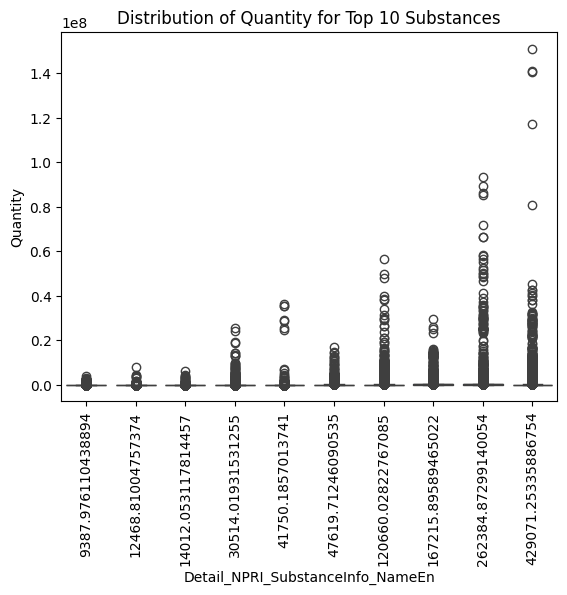

In [ ]:
# Get the top 10 substances by 'Quantity'
top_10_substances = train_data['Detail_NPRI_SubstanceInfo_NameEn'].value_counts().head(10).index

# Create a boxplot of the 'Quantity' column grouped by 'Detail_NPRI_SubstanceInfo_NameEn' for the top 10 substances
sns.boxplot(data=train_data[train_data['Detail_NPRI_SubstanceInfo_NameEn'].isin(top_10_substances)], x='Detail_NPRI_SubstanceInfo_NameEn', y='Quantity')
plt.xticks(rotation=90)
plt.title('Distribution of Quantity for Top 10 Substances')
plt.show()


#Handling outliers

In [ ]:
#handle the outliers in the quantity column by grouping by Detail_NPRI_SubstanceInfo_NameEn in all train_data ,val_data and test data

# Handle outliers in the 'Quantity' column by grouping by 'Detail_NPRI_SubstanceInfo_NameEn'
for d in [train_data, val_data, test_data]:
    # Calculate the lower and upper bounds for each group
    bounds = d.groupby('Detail_NPRI_SubstanceInfo_NameEn')['Quantity'].agg(['mean', 'std'])
    bounds['lower'] = bounds['mean'] - (2 * bounds['std'])
    bounds['upper'] = bounds['mean'] + (2 * bounds['std'])

    # Replace outliers with the mean of the corresponding group
    for group, bounds in bounds.iterrows():
        d.loc[(d['Detail_NPRI_SubstanceInfo_NameEn'] == group) & (d['Quantity'] < bounds['lower']), 'Quantity'] = bounds['mean']
        d.loc[(d['Detail_NPRI_SubstanceInfo_NameEn'] == group) & (d['Quantity'] > bounds['upper']), 'Quantity'] = bounds['mean']


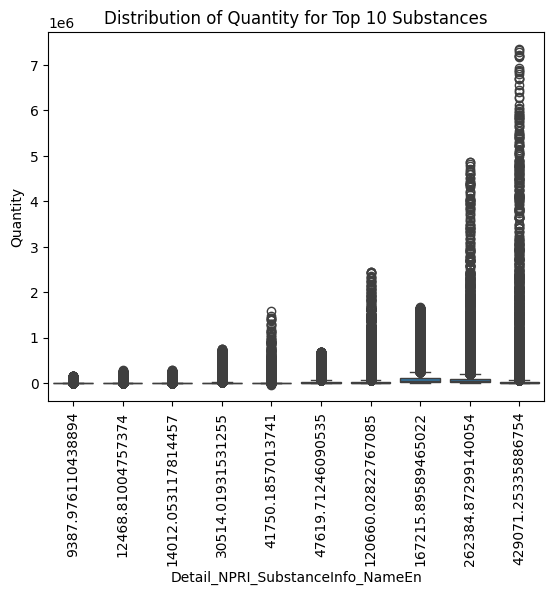

In [ ]:
# Get the top 10 substances by 'Quantity'
top_10_substances = train_data['Detail_NPRI_SubstanceInfo_NameEn'].value_counts().head(10).index

# Create a boxplot of the 'Quantity' column grouped by 'Detail_NPRI_SubstanceInfo_NameEn' for the top 10 substances
sns.boxplot(data=train_data[train_data['Detail_NPRI_SubstanceInfo_NameEn'].isin(top_10_substances)], x='Detail_NPRI_SubstanceInfo_NameEn', y='Quantity')
plt.xticks(rotation=90)
plt.title('Distribution of Quantity for Top 10 Substances')
plt.show()

In [ ]:
if type(train_data) != pd.core.frame.DataFrame:
    train_data = pd.DataFrame(train_data)

if type(test_data) != pd.core.frame.DataFrame:
    test_data = pd.DataFrame(test_data)

if type(val_data) != pd.core.frame.DataFrame:
    val_data = pd.DataFrame(val_data)

#Feature engineering

In [ ]:
# prompt: rename report year as report year in all datas

train_data = train_data.rename(columns={"NPRI_Report_ReportYear": "ReportYear"})
val_data = val_data.rename(columns={"NPRI_Report_ReportYear": "ReportYear"})
test_data = test_data.rename(columns={"NPRI_Report_ReportYear": "ReportYear"})


In [ ]:
train_data

,NpriID,ReportYear,Quantity,NAICSPrimary,Number of employees,YearMinus1,YearMinus2,PercentChange,DifferenceChange,ThreeYearAvg,...,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Company name,FacilityName,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category
166398,1495,2014,10904.000,325189,53.0,10904.0000,10904.000,0.00,0.0,10904.000000,...,0,0,0,0,0,72916.116290,106455.079122,825.616914,825.616914,132668.869815
328329,28004,2016,3077.000,211113,1.0,1993.0000,7660.000,54.39,1084.0,4243.333333,...,0,0,0,0,0,34080.924973,72025.529155,9387.976110,9387.976110,97092.204131
203700,29160,2017,22500.000,562110,118.0,6700.0000,48000.000,235.82,15800.0,25733.333333,...,0,0,0,0,0,16562.621981,13800.637145,14012.053118,14012.053118,20353.911593
461561,2274,2016,212.000,211114,3725.0,15.0000,231.000,1313.33,197.0,152.666667,...,0,0,0,0,0,472516.682205,633330.379549,12709.380170,12709.380170,97092.204131
457028,3897,2021,30.452,324110,813.0,30.4520,30.452,0.00,0.0,30.452000,...,0,0,0,1,0,95490.147863,159292.616955,105549.767158,105549.767158,41808.792875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225636,24500,2018,0.000,211110,1.0,0.0000,0.000,0.00,0.0,0.000000,...,1,0,0,0,0,19266.878628,20834.758202,429071.253359,429071.253359,97092.204131
225279,24508,2020,131.000,211110,1.0,122.0000,120.000,7.38,9.0,124.333333,...,0,0,1,0,0,19266.878628,41129.040765,9387.976110,9387.976110,97092.204131
117706,6427,2016,41.000,325190,150.0,23.0000,5.000,78.26,18.0,23.000000,...,0,0,0,0,0,20516.968623,20516.968623,484244.773747,484244.773747,12051.202917
129827,4755,2016,3136.000,221320,17.0,3974.0000,3190.000,-21.09,-838.0,3433.333333,...,0,0,0,0,0,39850.342567,31266.187298,269332.751969,269332.751969,55311.794903


In [ ]:
# For training data

train_data['NAICSSubstanceAvg'] = train_data.groupby(['NAICSPrimary','Detail_NPRI_SubstanceInfo_NameEn' ,'ReportYear'])['Quantity'].transform('mean')
train_data['NumStandardDeviation'] = train_data.groupby(['NAICSPrimary', 'Detail_NPRI_SubstanceInfo_NameEn','ReportYear'])['Quantity'].transform('std')
train_data['StandardDeviation'] = train_data.groupby(['NAICSPrimary', 'Detail_NPRI_SubstanceInfo_NameEn','ReportYear'])['Quantity'].transform(lambda x: np.std(x))
train_data['NAICSSubstanceTotal'] = train_data.groupby(['NAICSPrimary', 'Detail_NPRI_SubstanceInfo_NameEn','ReportYear'])['Quantity'].transform('sum')



# For test data

test_data['NAICSSubstanceAvg'] = test_data.groupby(['NAICSPrimary', 'Detail_NPRI_SubstanceInfo_NameEn','ReportYear'])['Quantity'].transform('mean')
test_data['NumStandardDeviation'] = test_data.groupby(['NAICSPrimary', 'Detail_NPRI_SubstanceInfo_NameEn','ReportYear'])['Quantity'].transform('std')
test_data['StandardDeviation'] = test_data.groupby(['NAICSPrimary', 'Detail_NPRI_SubstanceInfo_NameEn','ReportYear'])['Quantity'].transform(lambda x: np.std(x))
test_data['NAICSSubstanceTotal'] = test_data.groupby(['NAICSPrimary', 'Detail_NPRI_SubstanceInfo_NameEn','ReportYear'])['Quantity'].transform('sum')



# For validation data

val_data['NAICSSubstanceAvg'] = val_data.groupby(['NAICSPrimary', 'Detail_NPRI_SubstanceInfo_NameEn','ReportYear'])['Quantity'].transform('mean')
val_data['NumStandardDeviation'] = val_data.groupby(['NAICSPrimary', 'Detail_NPRI_SubstanceInfo_NameEn','ReportYear'])['Quantity'].transform('std')
val_data['StandardDeviation'] = val_data.groupby(['NAICSPrimary', 'Detail_NPRI_SubstanceInfo_NameEn','ReportYear'])['Quantity'].transform(lambda x: np.std(x))
val_data['NAICSSubstanceTotal'] = val_data.groupby(['NAICSPrimary', 'Detail_NPRI_SubstanceInfo_NameEn','ReportYear'])['Quantity'].transform('sum')




In [ ]:
train_data

,NpriID,ReportYear,Quantity,NAICSPrimary,Number of employees,YearMinus1,YearMinus2,PercentChange,DifferenceChange,ThreeYearAvg,...,Year_2022,Company name,FacilityName,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceTotal
166398,1495,2014,10904.000,325189,53.0,10904.0000,10904.000,0.00,0.0,10904.000000,...,0,72916.116290,106455.079122,825.616914,825.616914,132668.869815,713.145653,2486.241244,2419.929527,1.354977e+04
328329,28004,2016,3077.000,211113,1.0,1993.0000,7660.000,54.39,1084.0,4243.333333,...,0,34080.924973,72025.529155,9387.976110,9387.976110,97092.204131,1915.207122,3451.994476,3450.497189,2.208234e+06
203700,29160,2017,22500.000,562110,118.0,6700.0000,48000.000,235.82,15800.0,25733.333333,...,0,16562.621981,13800.637145,14012.053118,14012.053118,20353.911593,20030.728571,27386.583293,25355.049277,1.402151e+05
461561,2274,2016,212.000,211114,3725.0,15.0000,231.000,1313.33,197.0,152.666667,...,0,472516.682205,633330.379549,12709.380170,12709.380170,97092.204131,832.500000,877.519515,620.500000,1.665000e+03
457028,3897,2021,30.452,324110,813.0,30.4520,30.452,0.00,0.0,30.452000,...,0,95490.147863,159292.616955,105549.767158,105549.767158,41808.792875,35962.695471,107644.404401,104430.411613,6.113658e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225636,24500,2018,0.000,211110,1.0,0.0000,0.000,0.00,0.0,0.000000,...,0,19266.878628,20834.758202,429071.253359,429071.253359,97092.204131,37846.506872,291279.625983,291208.815328,7.785026e+07
225279,24508,2020,131.000,211110,1.0,122.0000,120.000,7.38,9.0,124.333333,...,0,19266.878628,41129.040765,9387.976110,9387.976110,97092.204131,1380.586191,3836.076173,3835.069725,2.631397e+06
117706,6427,2016,41.000,325190,150.0,23.0000,5.000,78.26,18.0,23.000000,...,0,20516.968623,20516.968623,484244.773747,484244.773747,12051.202917,4236.900000,12920.523075,12257.484444,4.236900e+04
129827,4755,2016,3136.000,221320,17.0,3974.0000,3190.000,-21.09,-838.0,3433.333333,...,0,39850.342567,31266.187298,269332.751969,269332.751969,55311.794903,52520.385425,147156.207187,146858.018011,1.297254e+07


In [ ]:
test_data['NumStandardDeviation'].fillna(0, inplace=True)
train_data['NumStandardDeviation'].fillna(0, inplace=True)
val_data['NumStandardDeviation'].fillna(0, inplace=True)


In [ ]:
# prompt: NumStandardDeviation as StandardDeviation - NumStandardDeviation

train_data['NumStandardDeviation'] = train_data['StandardDeviation'] - train_data['NumStandardDeviation']
test_data['NumStandardDeviation'] = test_data['StandardDeviation'] - test_data['NumStandardDeviation']
val_data['NumStandardDeviation'] = val_data['StandardDeviation'] - val_data['NumStandardDeviation']


In [ ]:
train_data

,NpriID,ReportYear,Quantity,NAICSPrimary,Number of employees,YearMinus1,YearMinus2,PercentChange,DifferenceChange,ThreeYearAvg,...,Year_2022,Company name,FacilityName,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceTotal
166398,1495,2014,10904.000,325189,53.0,10904.0000,10904.000,0.00,0.0,10904.000000,...,0,72916.116290,106455.079122,825.616914,825.616914,132668.869815,713.145653,-66.311717,2419.929527,1.354977e+04
328329,28004,2016,3077.000,211113,1.0,1993.0000,7660.000,54.39,1084.0,4243.333333,...,0,34080.924973,72025.529155,9387.976110,9387.976110,97092.204131,1915.207122,-1.497287,3450.497189,2.208234e+06
203700,29160,2017,22500.000,562110,118.0,6700.0000,48000.000,235.82,15800.0,25733.333333,...,0,16562.621981,13800.637145,14012.053118,14012.053118,20353.911593,20030.728571,-2031.534016,25355.049277,1.402151e+05
461561,2274,2016,212.000,211114,3725.0,15.0000,231.000,1313.33,197.0,152.666667,...,0,472516.682205,633330.379549,12709.380170,12709.380170,97092.204131,832.500000,-257.019515,620.500000,1.665000e+03
457028,3897,2021,30.452,324110,813.0,30.4520,30.452,0.00,0.0,30.452000,...,0,95490.147863,159292.616955,105549.767158,105549.767158,41808.792875,35962.695471,-3213.992789,104430.411613,6.113658e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225636,24500,2018,0.000,211110,1.0,0.0000,0.000,0.00,0.0,0.000000,...,0,19266.878628,20834.758202,429071.253359,429071.253359,97092.204131,37846.506872,-70.810655,291208.815328,7.785026e+07
225279,24508,2020,131.000,211110,1.0,122.0000,120.000,7.38,9.0,124.333333,...,0,19266.878628,41129.040765,9387.976110,9387.976110,97092.204131,1380.586191,-1.006448,3835.069725,2.631397e+06
117706,6427,2016,41.000,325190,150.0,23.0000,5.000,78.26,18.0,23.000000,...,0,20516.968623,20516.968623,484244.773747,484244.773747,12051.202917,4236.900000,-663.038632,12257.484444,4.236900e+04
129827,4755,2016,3136.000,221320,17.0,3974.0000,3190.000,-21.09,-838.0,3433.333333,...,0,39850.342567,31266.187298,269332.751969,269332.751969,55311.794903,52520.385425,-298.189176,146858.018011,1.297254e+07


In [ ]:
train_data.columns

Index(['NpriID', 'ReportYear', 'Quantity', 'NAICSPrimary',
       'Number of employees', 'YearMinus1', 'YearMinus2', 'PercentChange',
       'DifferenceChange', 'ThreeYearAvg', 'reduction_Coal',
       'reduction_Air releases', 'reduction_Arsenic', 'reduction_CO',
       'reduction_Cadium', 'reduction_Chromium', 'reduction_Cyanide',
       'reduction_HCL', 'reduction_HF', 'reduction_Mercury',
       'reduction_More coal', 'reduction_NOx', 'reduction_PM10',
       'reduction_PM2.5', 'reduction_PM2.5, PM10, and TPM',
       'reduction_Road dust', 'reduction_S02', 'reduction_SO2',
       'reduction_Sulfur', 'reduction_TPM', 'reduction_VOC', 'reduction_Water',
       'reduction_air releases', 'Year_2014', 'Year_2015', 'Year_2016',
       'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021',
       'Year_2022', 'Company name', 'FacilityName', 'Cas',
       'Detail_NPRI_SubstanceInfo_NameEn', 'Category', 'NAICSSubstanceAvg',
       'NumStandardDeviation', 'StandardDeviation', 'NAI

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialize the scaler
scaler = MinMaxScaler()

# Columns to scale
columns_to_scale = ['YearMinus1', 'YearMinus2', 'PercentChange', 'DifferenceChange', 'ThreeYearAvg', 'NAICSSubstanceAvg', 'NumStandardDeviation', 'StandardDeviation', 'NAICSSubstanceTotal',]

# Perform scaling on train_data
scaled_train_data = scaler.fit_transform(train_data[columns_to_scale])
scaled_train_data_df = pd.DataFrame(scaled_train_data, columns=columns_to_scale)

# Reset the index of train_data
train_data_reset_index = train_data.reset_index(drop=True)

# Concatenate with the rest of the columns
train_data_scaled = pd.concat([scaled_train_data_df, train_data_reset_index.drop(columns=columns_to_scale)], axis=1)

# Perform scaling on val_data
scaled_val_data = scaler.transform(val_data[columns_to_scale])
scaled_val_data_df = pd.DataFrame(scaled_val_data, columns=columns_to_scale)

# Reset the index of val_data
val_data_reset_index = val_data.reset_index(drop=True)

# Concatenate with the rest of the columns
val_data_scaled = pd.concat([scaled_val_data_df, val_data_reset_index.drop(columns=columns_to_scale)], axis=1)

# Perform scaling on test_data
scaled_test_data = scaler.transform(test_data[columns_to_scale])
scaled_test_data_df = pd.DataFrame(scaled_test_data, columns=columns_to_scale)

# Reset the index of test_data
test_data_reset_index = test_data.reset_index(drop=True)

# Concatenate with the rest of the columns
test_data_scaled = pd.concat([scaled_test_data_df, test_data_reset_index.drop(columns=columns_to_scale)], axis=1)



In [ ]:
train_data=train_data_scaled
test_data=test_data_scaled
val_data=val_data_scaled

In [ ]:
train_data

,YearMinus1,YearMinus2,PercentChange,DifferenceChange,ThreeYearAvg,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceTotal,NpriID,...,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Company name,FacilityName,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category
0,0.001179,0.001179,0.000001,0.693252,0.000317,0.000171,0.999937,0.000593,8.010428e-05,1495,...,0,0,0,0,0,72916.116290,106455.079122,825.616914,825.616914,132668.869815
1,0.001149,0.001168,0.000001,0.693254,0.000295,0.000460,0.999999,0.000846,1.305476e-02,28004,...,0,0,0,0,0,34080.924973,72025.529155,9387.976110,9387.976110,97092.204131
2,0.001165,0.001305,0.000001,0.693289,0.000368,0.004810,0.998056,0.006217,8.289316e-04,29160,...,0,0,0,0,0,16562.621981,13800.637145,14012.053118,14012.053118,20353.911593
3,0.001142,0.001143,0.000001,0.693252,0.000281,0.000200,0.999754,0.000152,9.843241e-06,2274,...,0,0,0,0,0,472516.682205,633330.379549,12709.380170,12709.380170,97092.204131
4,0.001142,0.001142,0.000001,0.693252,0.000281,0.008635,0.996925,0.025606,3.614307e-03,3897,...,0,0,0,1,0,95490.147863,159292.616955,105549.767158,105549.767158,41808.792875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372878,0.001142,0.001142,0.000001,0.693252,0.000280,0.009087,0.999932,0.071404,4.602396e-01,24500,...,1,0,0,0,0,19266.878628,20834.758202,429071.253359,429071.253359,97092.204131
372879,0.001143,0.001143,0.000001,0.693252,0.000281,0.000331,0.999999,0.000940,1.555644e-02,24508,...,0,0,1,0,0,19266.878628,41129.040765,9387.976110,9387.976110,97092.204131
372880,0.001142,0.001142,0.000001,0.693252,0.000281,0.001017,0.999366,0.003006,2.504795e-04,6427,...,0,0,0,0,0,20516.968623,20516.968623,484244.773747,484244.773747,12051.202917
372881,0.001156,0.001153,0.000001,0.693250,0.000292,0.012610,0.999715,0.036010,7.669177e-02,4755,...,0,0,0,0,0,39850.342567,31266.187298,269332.751969,269332.751969,55311.794903


#Feature Selection

##Based on correlation

In [ ]:
corr = train_data.corr()
corr.head()

,YearMinus1,YearMinus2,PercentChange,DifferenceChange,ThreeYearAvg,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceTotal,NpriID,...,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Company name,FacilityName,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category
YearMinus1,1.000000,0.897982,-0.000126,-0.376784,0.967269,0.173571,-0.119510,0.164382,0.005735,-0.023438,...,-0.001994,-0.003967,-0.001514,-0.001709,NaN,0.160712,0.189660,0.081220,0.081220,0.098296
YearMinus2,0.897982,1.000000,-0.000115,-0.198542,0.960597,0.174801,-0.121871,0.165020,0.005735,-0.024318,...,-0.000538,-0.003370,-0.002532,-0.001859,NaN,0.156205,0.192898,0.081521,0.081521,0.095860
PercentChange,-0.000126,-0.000115,1.000000,0.000177,-0.000101,-0.000647,0.000315,-0.000720,-0.000759,-0.001098,...,-0.000804,-0.000361,-0.000757,0.004110,NaN,-0.000479,-0.000495,-0.000785,-0.000785,-0.000374
DifferenceChange,-0.376784,-0.198542,0.000177,1.000000,-0.172921,-0.006295,0.004318,-0.003717,-0.000298,0.002627,...,-0.002154,0.002991,0.000220,-0.000389,NaN,0.002501,-0.031421,-0.006017,-0.006017,0.001944
ThreeYearAvg,0.967269,0.960597,-0.000101,-0.172921,1.000000,0.184395,-0.127505,0.174816,0.006063,-0.024861,...,-0.001963,-0.003522,-0.001940,-0.001940,NaN,0.170102,0.198107,0.085680,0.085680,0.104222


<Axes: >

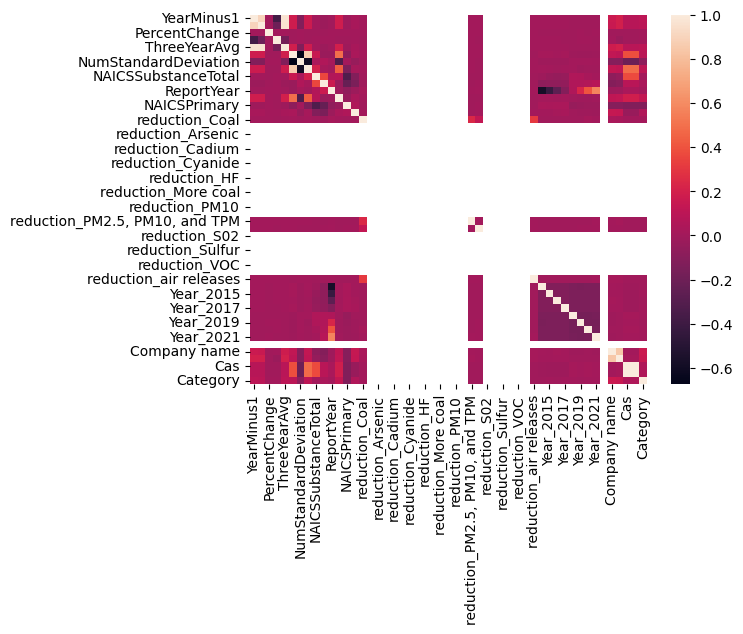

In [ ]:
sns.heatmap(corr)

In [ ]:
#removing columns that have correaltion greater than 0.9
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [ ]:
selected_columns = train_data.columns[columns]
selected_columns.shape

(49,)

In [ ]:
selected_columns

Index(['YearMinus1', 'YearMinus2', 'PercentChange', 'DifferenceChange',
       'NAICSSubstanceAvg', 'NumStandardDeviation', 'StandardDeviation',
       'NAICSSubstanceTotal', 'NpriID', 'ReportYear', 'Quantity',
       'NAICSPrimary', 'Number of employees', 'reduction_Coal',
       'reduction_Air releases', 'reduction_Arsenic', 'reduction_CO',
       'reduction_Cadium', 'reduction_Chromium', 'reduction_Cyanide',
       'reduction_HCL', 'reduction_HF', 'reduction_Mercury',
       'reduction_More coal', 'reduction_NOx', 'reduction_PM10',
       'reduction_PM2.5', 'reduction_PM2.5, PM10, and TPM',
       'reduction_Road dust', 'reduction_S02', 'reduction_SO2',
       'reduction_Sulfur', 'reduction_TPM', 'reduction_VOC', 'reduction_Water',
       'reduction_air releases', 'Year_2014', 'Year_2015', 'Year_2016',
       'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021',
       'Year_2022', 'Company name', 'FacilityName', 'Cas', 'Category'],
      dtype='object')

In [ ]:
# use selected columns for all datas

train_data1 = train_data[selected_columns]
val_data1 = val_data[selected_columns]


In [ ]:
# split val data1

X_validation = val_data1.drop(columns=['Quantity'])
y_validation = val_data1['Quantity']


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Initialize the models
random_forest_model = RandomForestRegressor()
decision_tree_model = DecisionTreeRegressor()

In [ ]:
# performing regressor models with selected columns

# Split the data into features and target
X_train = train_data1.drop('Quantity', axis=1)
y_train = train_data1['Quantity']



# Fit the models
random_forest_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)




DecisionTreeRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Make predictions on the validation data
rf_predictions = random_forest_model.predict(X_validation)
dt_predictions = decision_tree_model.predict(X_validation)

# Calculate the mean squared error
rf_mse = mean_squared_error(y_validation, rf_predictions)
dt_mse = mean_squared_error(y_validation, dt_predictions)

# Print the results
print('Random Forest Mean Squared Error:', rf_mse)
print('Decision Tree Mean Squared Error:', dt_mse)

Random Forest Mean Squared Error: 5819468557.134248
Decision Tree Mean Squared Error: 7719807525.62378


##Based on p value

In [ ]:
import statsmodels.api as sm

In [ ]:
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)

    regressor_OLS.summary()
    return x, columns

In [ ]:
x = train_data.drop('Quantity', axis=1).values
Y = train_data['Quantity'].values

In [ ]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(x, Y, SL, selected_columns)


In [ ]:
selected_columns

Index(['YearMinus1', 'YearMinus2', 'DifferenceChange', 'NAICSSubstanceAvg',
       'NumStandardDeviation', 'NAICSSubstanceTotal', 'NpriID', 'ReportYear',
       'NAICSPrimary', 'reduction_Coal', 'reduction_Cyanide', 'reduction_HCL',
       'reduction_HF', 'reduction_Mercury', 'reduction_More coal',
       'reduction_NOx', 'reduction_PM10', 'reduction_PM2.5', 'reduction_S02',
       'reduction_SO2', 'reduction_Sulfur', 'reduction_TPM', 'reduction_VOC',
       'reduction_Water', 'Year_2022', 'Company name', 'FacilityName'],
      dtype='object')

In [ ]:

selected_columns = selected_columns.append(pd.Index(['Quantity']))

In [ ]:
# Select the data based on the selected columns
train_data3 = train_data[selected_columns]
val_data3  = val_data[selected_columns]


In [ ]:
X_validation = val_data3.drop(columns=['Quantity'])
y_validation = val_data3['Quantity']

In [ ]:
X_train = train_data3.drop('Quantity', axis=1)
y_train = train_data3['Quantity']

In [ ]:
random_forest_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Make predictions on the validation data
rf_predictions = random_forest_model.predict(X_validation)
dt_predictions = decision_tree_model.predict(X_validation)

# Calculate the mean squared error
rf_mse = mean_squared_error(y_validation, rf_predictions)
dt_mse = mean_squared_error(y_validation, dt_predictions)

# Print the results
print('Random Forest Mean Squared Error:', rf_mse)
print('Decision Tree Mean Squared Error:', dt_mse)

Random Forest Mean Squared Error: 8907901224.68825
Decision Tree Mean Squared Error: 11465758711.161976


In [ ]:
# prompt: linear regression model also

# Import the necessary libraries
import statsmodels.api as sm

# Define the independent and dependent variables
X_train = train_data3.drop('Quantity', axis=1)
y_train = train_data3['Quantity']

# Add a constant term to the independent variables
X_train_sm = sm.add_constant(X_train)

# Create and fit the linear regression model
model = sm.OLS(y_train, X_train_sm).fit()

# Make predictions on the validation data
X_validation_sm = sm.add_constant(val_data3.drop('Quantity', axis=1))
y_pred = model.predict(X_validation_sm)

# Calculate the mean squared error
mse = mean_squared_error(val_data3['Quantity'], y_pred)

# Print the results
print('Linear Regression Mean Squared Error:', mse)


Linear Regression Mean Squared Error: 28955462483.54672


#Solving the problem statement


Predicting the release from fossil fuel electric genartion by phasing out the coal power plants





In [ ]:
# prompt: concat train_data and val_data

train = pd.concat([train_data, val_data])


In [ ]:
train

,YearMinus1,YearMinus2,PercentChange,DifferenceChange,ThreeYearAvg,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceTotal,NpriID,...,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Company name,FacilityName,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category
0,0.001179,0.001179,0.000001,0.693252,0.000317,0.000171,0.999937,0.000593,0.000080,1495,...,0,0,0,0,0,72916.116290,106455.079122,825.616914,825.616914,132668.869815
1,0.001149,0.001168,0.000001,0.693254,0.000295,0.000460,0.999999,0.000846,0.013055,28004,...,0,0,0,0,0,34080.924973,72025.529155,9387.976110,9387.976110,97092.204131
2,0.001165,0.001305,0.000001,0.693289,0.000368,0.004810,0.998056,0.006217,0.000829,29160,...,0,0,0,0,0,16562.621981,13800.637145,14012.053118,14012.053118,20353.911593
3,0.001142,0.001143,0.000001,0.693252,0.000281,0.000200,0.999754,0.000152,0.000010,2274,...,0,0,0,0,0,472516.682205,633330.379549,12709.380170,12709.380170,97092.204131
4,0.001142,0.001142,0.000001,0.693252,0.000281,0.008635,0.996925,0.025606,0.003614,3897,...,0,0,0,1,0,95490.147863,159292.616955,105549.767158,105549.767158,41808.792875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93216,0.001283,0.001283,0.000001,0.693252,0.000421,0.023487,0.999504,0.083905,0.191415,24132,...,0,0,0,0,0,39263.576083,78460.655811,262384.872991,262384.872991,97092.204131
93217,0.001142,0.001142,0.000003,0.693252,0.000280,0.000004,0.999998,0.000008,0.000001,3707,...,0,0,0,1,0,85188.313964,81778.741004,178.277924,178.277924,13145.057659
93218,0.001225,0.001285,0.000001,0.693206,0.000361,0.021117,0.996724,0.035674,0.011439,30822,...,0,0,0,1,0,51086.629711,69850.688315,262384.872991,262384.872991,97092.204131
93219,0.001143,0.001143,0.000001,0.693252,0.000281,0.014261,0.997709,0.023771,0.007374,25188,...,1,0,0,0,0,250693.892567,303462.962982,179235.162968,179235.162968,54991.697568


In [ ]:
test=test_data

In [ ]:
test

,YearMinus1,YearMinus2,PercentChange,DifferenceChange,ThreeYearAvg,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceTotal,NpriID,...,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Company name,FacilityName,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category
0,0.001219,0.001206,0.000001,0.693292,0.000372,0.042296,0.999116,0.084400,0.194742,11017,...,0,0,0,0,1,58606.467436,62958.925735,233366.535791,233366.535791,90223.889519
1,0.001180,0.001210,0.000001,0.693275,0.000339,0.019013,0.999843,0.040939,0.239215,10979,...,0,0,0,0,1,27040.843665,27040.843665,92557.018795,92557.018795,90223.889519
2,0.001172,0.001145,0.000001,0.693231,0.000291,0.019013,0.999843,0.040939,0.239215,10979,...,0,0,0,0,1,27040.843665,27040.843665,92557.018795,92557.018795,90223.889519
3,0.001156,0.001144,0.000001,0.693243,0.000286,0.024022,0.999519,0.090851,0.218248,10979,...,0,0,0,0,1,27040.843665,27040.843665,269332.751969,269332.751969,90223.889519
4,0.001156,0.001174,0.000001,0.693261,0.000305,0.007927,0.999673,0.024183,0.028301,24231,...,0,0,0,0,1,90223.889519,14851.890023,120660.028228,120660.028228,90223.889519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82420,0.001142,0.001142,0.000001,0.693252,0.000280,0.011016,0.993483,0.030873,0.002712,3501,...,0,0,0,0,1,3122.952788,1839.447523,440369.390214,440369.390214,97092.204131
82421,0.001142,0.001142,0.000001,0.693252,0.000280,0.011016,0.993483,0.030873,0.002712,2198,...,0,0,0,0,1,3122.952788,696.027313,440369.390214,440369.390214,97092.204131
82422,0.001142,0.001142,0.000001,0.693252,0.000280,0.002732,0.999996,0.010464,0.311277,31900,...,0,0,0,0,1,90223.889519,96675.220697,47619.712461,47619.712461,23437.341318
82423,0.001142,0.001142,0.000001,0.693252,0.000280,0.015064,0.999916,0.081891,0.709149,32712,...,0,0,0,0,1,19145.208967,73343.268229,429071.253359,429071.253359,97092.204131


In [ ]:
# prompt: rows where NAICSTitleEn caonts fossil fuels  in df1

df1[df1['NAICSTitleEn'].str.contains('Fossil')]


,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Group,Category,Latitude,Longitude,ProvinceEn,NAICSPrimary,NAICSTitleEn,Substance comments by category for 2022,Substance comments for disposals and all media for 2022,Number of employees
9813,6219,Air Liquide Canada Inc.,Scotford Complex,2022,392268.3,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),Releases to Air,Stack / Point,53.798883,-113.084353,Alberta,221112,Fossil-fuel electric power generation,CEMS recorded higher NOx Emissions for gas tur...,NaN,26.0
9814,6219,Air Liquide Canada Inc.,Scotford Complex,2021,302749.1,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),Releases to Air,Stack / Point,53.798883,-113.084353,Alberta,221112,Fossil-fuel electric power generation,NaN,NaN,25.0
9815,6219,Air Liquide Canada Inc.,Scotford Complex,2014,269000.0,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),Releases to Air,Stack / Point,53.798883,-113.084353,Alberta,221112,Fossil-fuel electric power generation,NaN,NaN,28.0
9816,6219,Air Liquide Canada Inc.,Scotford Complex,2018,266110.0,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),Releases to Air,Stack / Point,53.798883,-113.084353,Alberta,221112,Fossil-fuel electric power generation,NaN,NaN,28.0
9817,6219,Air Liquide Canada Inc.,Scotford Complex,2019,262630.0,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),Releases to Air,Stack / Point,53.798883,-113.084353,Alberta,221112,Fossil-fuel electric power generation,NaN,NaN,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536276,25012,Yukon Energy Corp.,Faro Generating Station,2021,510.2,NA - M09,PM10 - Particulate Matter <= 10 Micrometers,Releases to Air,Stack / Point,62.233940,-133.361940,Yukon,221112,Fossil-fuel electric power generation,NaN,NaN,1.0
536277,25012,Yukon Energy Corp.,Faro Generating Station,2021,492.7,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,Releases to Air,Stack / Point,62.233940,-133.361940,Yukon,221112,Fossil-fuel electric power generation,NaN,NaN,1.0
536278,24172,Yukon Energy Corp.,Dawson City Power Generation Facility,2021,395.4,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,Releases to Air,Stack / Point,64.054554,-139.440245,Yukon,221112,Fossil-fuel electric power generation,NaN,NaN,3.0
536279,24172,Yukon Energy Corp.,Dawson City Power Generation Facility,2015,315.7,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,Releases to Air,Stack / Point,64.054554,-139.440245,Yukon,221112,Fossil-fuel electric power generation,NaN,NaN,89.0


In [ ]:
# prompt: filter all test and test where NAICSPrimary is221112

test = test[test['NAICSPrimary'] == 221112]
train = train[train['NAICSPrimary'] == 221112]


In [ ]:
test

,YearMinus1,YearMinus2,PercentChange,DifferenceChange,ThreeYearAvg,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceTotal,NpriID,...,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Company name,FacilityName,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category
129,0.001235,0.001224,0.000001,0.693310,0.000397,0.056774,0.998860,0.110578,0.265598,4480,...,0,0,0,0,1,83068.053711,83068.053711,167215.895895,167215.895895,90223.889519
130,0.001148,0.001146,0.000001,0.693254,0.000286,0.003896,0.999858,0.015841,0.020914,4480,...,0,0,0,0,1,83068.053711,83068.053711,30514.019315,30514.019315,90223.889519
131,0.001148,0.001146,0.000001,0.693254,0.000286,0.003315,0.999878,0.013942,0.018282,4480,...,0,0,0,0,1,83068.053711,83068.053711,9387.976110,9387.976110,90223.889519
297,0.001351,0.001241,0.000001,0.693395,0.000521,0.056774,0.998860,0.110578,0.265598,29241,...,0,0,0,0,1,23742.654362,23742.654362,167215.895895,167215.895895,90223.889519
413,0.001144,0.001145,0.000001,0.693254,0.000283,0.003315,0.999878,0.013942,0.018282,31004,...,0,0,0,0,1,35448.539466,69894.879238,9387.976110,9387.976110,90223.889519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82233,0.001169,0.001174,0.000001,0.693247,0.000306,0.003315,0.999878,0.013942,0.018282,20185,...,0,0,0,0,1,123300.209039,140916.464802,9387.976110,9387.976110,97092.204131
82234,0.001144,0.001145,0.000001,0.693253,0.000283,0.003896,0.999858,0.015841,0.020914,25012,...,0,0,0,0,1,123300.209039,75976.925372,30514.019315,30514.019315,97092.204131
82235,0.001144,0.001143,0.000001,0.693253,0.000283,0.003315,0.999878,0.013942,0.018282,25012,...,0,0,0,0,1,123300.209039,75976.925372,9387.976110,9387.976110,97092.204131
82236,0.001145,0.001145,0.000001,0.693252,0.000283,0.003896,0.999858,0.015841,0.020914,24172,...,0,0,0,0,1,123300.209039,78181.276712,30514.019315,30514.019315,97092.204131


In [ ]:
train

,YearMinus1,YearMinus2,PercentChange,DifferenceChange,ThreeYearAvg,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceTotal,NpriID,...,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Company name,FacilityName,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category
39,0.001152,0.001152,0.000001,0.693252,0.000290,0.000165,0.999979,0.000261,0.000102,2079,...,0,0,0,0,0,746532.296360,1.678778e+06,2126.373402,2126.373402,41808.792875
47,0.001149,0.001146,0.000001,0.693253,0.000287,0.005703,0.999729,0.021808,0.022187,8104,...,0,1,0,0,0,147168.498007,5.516662e+04,30514.019315,30514.019315,97092.204131
85,0.001143,0.001143,0.000001,0.693252,0.000281,0.000007,0.999999,0.000010,0.000006,2284,...,0,0,0,0,0,982519.443750,1.410674e+06,308.457640,308.457640,13403.232179
103,0.001142,0.001142,0.000001,0.693252,0.000280,0.000017,0.999998,0.000034,0.000016,4882,...,0,0,0,0,0,147168.498007,5.042216e+05,2669.633666,2669.633666,41808.792875
114,0.009209,0.012284,0.000001,0.694829,0.010138,0.043194,0.998997,0.067982,0.141446,2083,...,0,0,0,1,0,746532.296360,3.351962e+05,167215.895895,167215.895895,97092.204131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93056,0.001191,0.001190,0.000001,0.693251,0.000328,0.005459,0.999220,0.017281,0.005914,6595,...,0,0,0,0,0,117509.357720,1.175094e+05,30514.019315,30514.019315,97092.204131
93074,0.001163,0.001165,0.000001,0.693254,0.000303,0.003429,0.999548,0.009328,0.003462,8094,...,0,0,0,0,0,147168.498007,6.281731e+04,30514.019315,30514.019315,97092.204131
93088,0.001145,0.001145,0.000001,0.693252,0.000283,0.000580,0.999932,0.001440,0.000599,10390,...,0,0,0,0,0,19443.374656,5.200637e+04,9387.976110,9387.976110,28522.415759
93174,0.001142,0.001142,0.000001,0.693252,0.000280,0.000004,0.999999,0.000008,0.000001,4000,...,0,0,0,0,0,446573.158877,9.385976e+04,2669.633666,2669.633666,97092.204131


In [ ]:
train.columns

Index(['YearMinus1', 'YearMinus2', 'PercentChange', 'DifferenceChange',
       'ThreeYearAvg', 'NAICSSubstanceAvg', 'NumStandardDeviation',
       'StandardDeviation', 'NAICSSubstanceTotal', 'NpriID', 'ReportYear',
       'Quantity', 'NAICSPrimary', 'Number of employees', 'reduction_Coal',
       'reduction_Air releases', 'reduction_Arsenic', 'reduction_CO',
       'reduction_Cadium', 'reduction_Chromium', 'reduction_Cyanide',
       'reduction_HCL', 'reduction_HF', 'reduction_Mercury',
       'reduction_More coal', 'reduction_NOx', 'reduction_PM10',
       'reduction_PM2.5', 'reduction_PM2.5, PM10, and TPM',
       'reduction_Road dust', 'reduction_S02', 'reduction_SO2',
       'reduction_Sulfur', 'reduction_TPM', 'reduction_VOC', 'reduction_Water',
       'reduction_air releases', 'Year_2014', 'Year_2015', 'Year_2016',
       'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021',
       'Year_2022', 'Company name', 'FacilityName', 'Cas',
       'Detail_NPRI_SubstanceInfo_Na

##Best model according to us is Random Forest

#Normal fitting

In [ ]:
# prompt: create new column year_2023 as 0

train['Year_2023'] = 0
test['Year_2023'] = 0


<ipython-input-458-6cb9da9fb1c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Year_2023'] = 0
<ipython-input-458-6cb9da9fb1c8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Year_2023'] = 0


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Split the data into features and target
X_train = train.drop('Quantity', axis=1)
y_train = train['Quantity']


In [ ]:
# prompt: fit model using random forest using train and test


# Initialize the model
model = RandomForestRegressor()

# Fit the model
model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
X_test = test.drop('Quantity', axis=1)
y_test = test['Quantity']


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the result
print('Root Mean Squared Error:', rmse)


Root Mean Squared Error: 157895.21420863632


In [ ]:
# prompt: r2 score to

from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test,y_pred))


R2 Score: 0.6781860409098126


In [ ]:
# prompt: also do linear regressor

# Import the necessary libraries
import statsmodels.api as sm

# Add a constant term to the independent variables
X_train_sm = sm.add_constant(X_train)

# Create and fit the linear regression model
model = sm.OLS(y_train, X_train_sm).fit()

# Make predictions on the test data
X_test_sm = sm.add_constant(test.drop('Quantity', axis=1))
y_pred = model.predict(X_test_sm)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the result
print('Root Mean Squared Error:', rmse)


Root Mean Squared Error: 7812518.139211949


In [ ]:

from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test,y_pred))


R2 Score: -786.8599462774598


In [ ]:

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)
print("R2 Score:", r2_score(y_test,y_pred))

Root Mean Squared Error: 237119.97243357045
R2 Score: 0.2742229747649022


##Fitting with selected columns from P value and Correalation feature selection

In [ ]:
# Select the data based on the selected columns
train1 = train[selected_columns]
test1 = test[selected_columns]

# Split the training data into features and target
X_train = train1.drop('Quantity', axis=1)
y_train = train1['Quantity']

# Split the testing data into features and target
X_test = test1.drop('Quantity', axis=1)
y_test = test1['Quantity']

# Initialize the model
model = RandomForestRegressor()

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred2 = model.predict(X_test)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred2))

# Print the result
print('Root Mean Squared Error:', rmse)


Root Mean Squared Error: 171573.38491130463


##Hyperparameters tunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
model = RandomForestRegressor()

# Initialize the randomized search
random_search = RandomizedSearchCV(model, params, n_iter=10, cv=5, scoring='neg_mean_squared_error', refit=True)

# Fit the randomized search
random_search.fit(X_train, y_train)



RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_squared_error')

In [ ]:
# Make predictions on the test data
y_pred3 = random_search.predict(X_test)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred3))

# Print the result
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 153876.99540892194


In [ ]:
best_params = random_search.best_params_
model = RandomForestRegressor(**best_params)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=300)

In [ ]:
# Make predictions on the test data
y_pred3 = model.predict(X_test)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred3))

# Print the result
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 153627.7317619109


In [ ]:
# prompt: r2 score

print("R2 Score:", r2_score(y_test,y_pred3))


R2 Score: 0.6953464931656013


In [ ]:
# prompt: prin best params

print("Best parameters:", random_search.best_params_)


Best parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': True}


##Predicting the Substance released by Fossil fuel electric genrators and Amount

Doing it with least rms value thst is y_pred

In [ ]:
# prompt: store the values of y pred as new column in test

X_test['Predicted_Quantity'] = y_pred


In [ ]:
X_test

,YearMinus1,YearMinus2,PercentChange,DifferenceChange,ThreeYearAvg,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceTotal,NpriID,...,Year_2020,Year_2021,Year_2022,Company name,FacilityName,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category,Year_2023,Predicted_Quantity
129,0.001235,0.001224,0.000001,0.693310,0.000397,0.056774,0.998860,0.110578,0.265598,4480,...,0,0,1,83068.053711,83068.053711,167215.895895,167215.895895,90223.889519,0,49877.937000
130,0.001148,0.001146,0.000001,0.693254,0.000286,0.003896,0.999858,0.015841,0.020914,4480,...,0,0,1,83068.053711,83068.053711,30514.019315,30514.019315,90223.889519,0,2503.048968
131,0.001148,0.001146,0.000001,0.693254,0.000286,0.003315,0.999878,0.013942,0.018282,4480,...,0,0,1,83068.053711,83068.053711,9387.976110,9387.976110,90223.889519,0,2498.801936
297,0.001351,0.001241,0.000001,0.693395,0.000521,0.056774,0.998860,0.110578,0.265598,29241,...,0,0,1,23742.654362,23742.654362,167215.895895,167215.895895,90223.889519,0,112922.786000
413,0.001144,0.001145,0.000001,0.693254,0.000283,0.003315,0.999878,0.013942,0.018282,31004,...,0,0,1,35448.539466,69894.879238,9387.976110,9387.976110,90223.889519,0,1212.008500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82233,0.001169,0.001174,0.000001,0.693247,0.000306,0.003315,0.999878,0.013942,0.018282,20185,...,0,0,1,123300.209039,140916.464802,9387.976110,9387.976110,97092.204131,0,5908.548750
82234,0.001144,0.001145,0.000001,0.693253,0.000283,0.003896,0.999858,0.015841,0.020914,25012,...,0,0,1,123300.209039,75976.925372,30514.019315,30514.019315,97092.204131,0,998.310000
82235,0.001144,0.001143,0.000001,0.693253,0.000283,0.003315,0.999878,0.013942,0.018282,25012,...,0,0,1,123300.209039,75976.925372,9387.976110,9387.976110,97092.204131,0,795.275000
82236,0.001145,0.001145,0.000001,0.693252,0.000283,0.003896,0.999858,0.015841,0.020914,24172,...,0,0,1,123300.209039,78181.276712,30514.019315,30514.019315,97092.204131,0,672.981000


In [ ]:
X_test[ 'Predicted_Quantity']

129       48462.447000
130        2386.435682
131        2372.458682
297      112897.300000
413        1228.931116
             ...      
82233      5804.947496
82234      1020.809200
82235       843.466000
82236       683.246000
82237       680.749000
Name: Predicted_Quantity, Length: 1587, dtype: float64

In [ ]:
test

,YearMinus1,YearMinus2,PercentChange,DifferenceChange,ThreeYearAvg,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceTotal,NpriID,...,Year_2019,Year_2020,Year_2021,Year_2022,Company name,FacilityName,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category,Year_2023
129,0.001235,0.001224,0.000001,0.693310,0.000397,0.056774,0.998860,0.110578,0.265598,4480,...,0,0,0,1,83068.053711,83068.053711,167215.895895,167215.895895,90223.889519,0
130,0.001148,0.001146,0.000001,0.693254,0.000286,0.003896,0.999858,0.015841,0.020914,4480,...,0,0,0,1,83068.053711,83068.053711,30514.019315,30514.019315,90223.889519,0
131,0.001148,0.001146,0.000001,0.693254,0.000286,0.003315,0.999878,0.013942,0.018282,4480,...,0,0,0,1,83068.053711,83068.053711,9387.976110,9387.976110,90223.889519,0
297,0.001351,0.001241,0.000001,0.693395,0.000521,0.056774,0.998860,0.110578,0.265598,29241,...,0,0,0,1,23742.654362,23742.654362,167215.895895,167215.895895,90223.889519,0
413,0.001144,0.001145,0.000001,0.693254,0.000283,0.003315,0.999878,0.013942,0.018282,31004,...,0,0,0,1,35448.539466,69894.879238,9387.976110,9387.976110,90223.889519,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82233,0.001169,0.001174,0.000001,0.693247,0.000306,0.003315,0.999878,0.013942,0.018282,20185,...,0,0,0,1,123300.209039,140916.464802,9387.976110,9387.976110,97092.204131,0
82234,0.001144,0.001145,0.000001,0.693253,0.000283,0.003896,0.999858,0.015841,0.020914,25012,...,0,0,0,1,123300.209039,75976.925372,30514.019315,30514.019315,97092.204131,0
82235,0.001144,0.001143,0.000001,0.693253,0.000283,0.003315,0.999878,0.013942,0.018282,25012,...,0,0,0,1,123300.209039,75976.925372,9387.976110,9387.976110,97092.204131,0
82236,0.001145,0.001145,0.000001,0.693252,0.000283,0.003896,0.999858,0.015841,0.020914,24172,...,0,0,0,1,123300.209039,78181.276712,30514.019315,30514.019315,97092.204131,0


#Creatinhg new data points

In [ ]:
# prompt: remove yaer minus2 from test

test.drop('YearMinus2', axis=1, inplace=True)


<ipython-input-469-912a663c1295>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('YearMinus2', axis=1, inplace=True)


In [ ]:
# prompt: rename Quantity as Yearminus1 and year minus1 as year minus 2 in test

test.rename(columns={"Quantity": "YearMinus1", "YearMinus1": "YearMinus2"}, inplace=True)


<ipython-input-470-c24b54f16c91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.rename(columns={"Quantity": "YearMinus1", "YearMinus1": "YearMinus2"}, inplace=True)


In [ ]:
# prompt: add Year_2022 =0

test['Year_2022'] = 0
test['Year_2023'] = 1

<ipython-input-474-061116fd4c47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Year_2022'] = 0
<ipython-input-474-061116fd4c47>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Year_2023'] = 1


In [ ]:
# prompt: set the test in same order as train

test


,YearMinus2,PercentChange,DifferenceChange,ThreeYearAvg,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceTotal,NpriID,ReportYear,...,Year_2020,Year_2021,Year_2022,Company name,FacilityName,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category,Year_2023,Year_20223
129,0.001235,0.000001,0.693310,0.000397,0.056774,0.998860,0.110578,0.265598,4480,2022,...,0,0,0,83068.053711,83068.053711,167215.895895,167215.895895,90223.889519,1,1
130,0.001148,0.000001,0.693254,0.000286,0.003896,0.999858,0.015841,0.020914,4480,2022,...,0,0,0,83068.053711,83068.053711,30514.019315,30514.019315,90223.889519,1,1
131,0.001148,0.000001,0.693254,0.000286,0.003315,0.999878,0.013942,0.018282,4480,2022,...,0,0,0,83068.053711,83068.053711,9387.976110,9387.976110,90223.889519,1,1
297,0.001351,0.000001,0.693395,0.000521,0.056774,0.998860,0.110578,0.265598,29241,2022,...,0,0,0,23742.654362,23742.654362,167215.895895,167215.895895,90223.889519,1,1
413,0.001144,0.000001,0.693254,0.000283,0.003315,0.999878,0.013942,0.018282,31004,2022,...,0,0,0,35448.539466,69894.879238,9387.976110,9387.976110,90223.889519,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82233,0.001169,0.000001,0.693247,0.000306,0.003315,0.999878,0.013942,0.018282,20185,2022,...,0,0,0,123300.209039,140916.464802,9387.976110,9387.976110,97092.204131,1,1
82234,0.001144,0.000001,0.693253,0.000283,0.003896,0.999858,0.015841,0.020914,25012,2022,...,0,0,0,123300.209039,75976.925372,30514.019315,30514.019315,97092.204131,1,1
82235,0.001144,0.000001,0.693253,0.000283,0.003315,0.999878,0.013942,0.018282,25012,2022,...,0,0,0,123300.209039,75976.925372,9387.976110,9387.976110,97092.204131,1,1
82236,0.001145,0.000001,0.693252,0.000283,0.003896,0.999858,0.015841,0.020914,24172,2022,...,0,0,0,123300.209039,78181.276712,30514.019315,30514.019315,97092.204131,1,1


In [ ]:
# prompt: drop Year_20223

test.drop('Year_20223', axis=1, inplace=True)


<ipython-input-476-0c152f63ddee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Year_20223', axis=1, inplace=True)


In [ ]:
test

,YearMinus2,PercentChange,DifferenceChange,ThreeYearAvg,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceTotal,NpriID,ReportYear,...,Year_2019,Year_2020,Year_2021,Year_2022,Company name,FacilityName,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category,Year_2023
129,0.001235,0.000001,0.693310,0.000397,0.056774,0.998860,0.110578,0.265598,4480,2022,...,0,0,0,0,83068.053711,83068.053711,167215.895895,167215.895895,90223.889519,1
130,0.001148,0.000001,0.693254,0.000286,0.003896,0.999858,0.015841,0.020914,4480,2022,...,0,0,0,0,83068.053711,83068.053711,30514.019315,30514.019315,90223.889519,1
131,0.001148,0.000001,0.693254,0.000286,0.003315,0.999878,0.013942,0.018282,4480,2022,...,0,0,0,0,83068.053711,83068.053711,9387.976110,9387.976110,90223.889519,1
297,0.001351,0.000001,0.693395,0.000521,0.056774,0.998860,0.110578,0.265598,29241,2022,...,0,0,0,0,23742.654362,23742.654362,167215.895895,167215.895895,90223.889519,1
413,0.001144,0.000001,0.693254,0.000283,0.003315,0.999878,0.013942,0.018282,31004,2022,...,0,0,0,0,35448.539466,69894.879238,9387.976110,9387.976110,90223.889519,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82233,0.001169,0.000001,0.693247,0.000306,0.003315,0.999878,0.013942,0.018282,20185,2022,...,0,0,0,0,123300.209039,140916.464802,9387.976110,9387.976110,97092.204131,1
82234,0.001144,0.000001,0.693253,0.000283,0.003896,0.999858,0.015841,0.020914,25012,2022,...,0,0,0,0,123300.209039,75976.925372,30514.019315,30514.019315,97092.204131,1
82235,0.001144,0.000001,0.693253,0.000283,0.003315,0.999878,0.013942,0.018282,25012,2022,...,0,0,0,0,123300.209039,75976.925372,9387.976110,9387.976110,97092.204131,1
82236,0.001145,0.000001,0.693252,0.000283,0.003896,0.999858,0.015841,0.020914,24172,2022,...,0,0,0,0,123300.209039,78181.276712,30514.019315,30514.019315,97092.204131,1


In [ ]:
# prompt: chane report year 2023 intest

test['ReportYear'] = 2023


<ipython-input-478-34afa8639010>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ReportYear'] = 2023


In [ ]:
train.columns

Index(['YearMinus1', 'YearMinus2', 'PercentChange', 'DifferenceChange',
       'ThreeYearAvg', 'NAICSSubstanceAvg', 'NumStandardDeviation',
       'StandardDeviation', 'NAICSSubstanceTotal', 'NpriID', 'ReportYear',
       'Quantity', 'NAICSPrimary', 'Number of employees', 'reduction_Coal',
       'reduction_Air releases', 'reduction_Arsenic', 'reduction_CO',
       'reduction_Cadium', 'reduction_Chromium', 'reduction_Cyanide',
       'reduction_HCL', 'reduction_HF', 'reduction_Mercury',
       'reduction_More coal', 'reduction_NOx', 'reduction_PM10',
       'reduction_PM2.5', 'reduction_PM2.5, PM10, and TPM',
       'reduction_Road dust', 'reduction_S02', 'reduction_SO2',
       'reduction_Sulfur', 'reduction_TPM', 'reduction_VOC', 'reduction_Water',
       'reduction_air releases', 'Year_2014', 'Year_2015', 'Year_2016',
       'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021',
       'Year_2022', 'Company name', 'FacilityName', 'Cas',
       'Detail_NPRI_SubstanceInfo_Na

In [ ]:
test.columns

Index(['YearMinus2', 'PercentChange', 'DifferenceChange', 'ThreeYearAvg',
       'NAICSSubstanceAvg', 'NumStandardDeviation', 'StandardDeviation',
       'NAICSSubstanceTotal', 'NpriID', 'ReportYear', 'YearMinus1',
       'NAICSPrimary', 'Number of employees', 'reduction_Coal',
       'reduction_Air releases', 'reduction_Arsenic', 'reduction_CO',
       'reduction_Cadium', 'reduction_Chromium', 'reduction_Cyanide',
       'reduction_HCL', 'reduction_HF', 'reduction_Mercury',
       'reduction_More coal', 'reduction_NOx', 'reduction_PM10',
       'reduction_PM2.5', 'reduction_PM2.5, PM10, and TPM',
       'reduction_Road dust', 'reduction_S02', 'reduction_SO2',
       'reduction_Sulfur', 'reduction_TPM', 'reduction_VOC', 'reduction_Water',
       'reduction_air releases', 'Year_2014', 'Year_2015', 'Year_2016',
       'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021',
       'Year_2022', 'Company name', 'FacilityName', 'Cas',
       'Detail_NPRI_SubstanceInfo_NameEn', 'Cate

In [ ]:
# prompt: add new column quantity

test['Quantity'] = 0


<ipython-input-481-cc4960a99479>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Quantity'] = 0


In [ ]:
# prompt: arrange test columns as x_train

test = test[X_train.columns]


In [ ]:
# prompt: predict qunatity in test

# Predicting the Quantity
test['Quantity'] = model.predict(test)

# Displaying the predicted quantity
test['Quantity']


129       50277.205000
130        2810.801652
131        2804.544620
297      110385.283000
413        2571.550000
             ...      
82233      6909.269300
82234      2713.378000
82235      2691.362000
82236      2407.743390
82237      2537.368570
Name: Quantity, Length: 1587, dtype: float64

In [ ]:
test.columns

Index(['YearMinus1', 'YearMinus2', 'PercentChange', 'DifferenceChange',
       'ThreeYearAvg', 'NAICSSubstanceAvg', 'NumStandardDeviation',
       'StandardDeviation', 'NAICSSubstanceTotal', 'NpriID', 'ReportYear',
       'NAICSPrimary', 'Number of employees', 'reduction_Coal',
       'reduction_Air releases', 'reduction_Arsenic', 'reduction_CO',
       'reduction_Cadium', 'reduction_Chromium', 'reduction_Cyanide',
       'reduction_HCL', 'reduction_HF', 'reduction_Mercury',
       'reduction_More coal', 'reduction_NOx', 'reduction_PM10',
       'reduction_PM2.5', 'reduction_PM2.5, PM10, and TPM',
       'reduction_Road dust', 'reduction_S02', 'reduction_SO2',
       'reduction_Sulfur', 'reduction_TPM', 'reduction_VOC', 'reduction_Water',
       'reduction_air releases', 'Year_2014', 'Year_2015', 'Year_2016',
       'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021',
       'Year_2022', 'Company name', 'FacilityName', 'Cas',
       'Detail_NPRI_SubstanceInfo_NameEn', 'Cate

In [ ]:
X = test[['Company name', 'FacilityName', 'Cas', 'Detail_NPRI_SubstanceInfo_NameEn', 'Category', 'Quantity','ReportYear']]
X

,Company name,FacilityName,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category,Quantity,ReportYear
129,83068.053711,83068.053711,167215.895895,167215.895895,90223.889519,50277.205000,2023
130,83068.053711,83068.053711,30514.019315,30514.019315,90223.889519,2810.801652,2023
131,83068.053711,83068.053711,9387.976110,9387.976110,90223.889519,2804.544620,2023
297,23742.654362,23742.654362,167215.895895,167215.895895,90223.889519,110385.283000,2023
413,35448.539466,69894.879238,9387.976110,9387.976110,90223.889519,2571.550000,2023
...,...,...,...,...,...,...,...
82233,123300.209039,140916.464802,9387.976110,9387.976110,97092.204131,6909.269300,2023
82234,123300.209039,75976.925372,30514.019315,30514.019315,97092.204131,2713.378000,2023
82235,123300.209039,75976.925372,9387.976110,9387.976110,97092.204131,2691.362000,2023
82236,123300.209039,78181.276712,30514.019315,30514.019315,97092.204131,2407.743390,2023


In [ ]:
X1 = X.rename(columns={'Detail_NPRI_SubstanceInfo_NameEn': 'number'})

In [ ]:
X1

In [ ]:
substance

,Detail_NPRI_SubstanceInfo_NameEn,Detail_NPRI_SubstanceInfo_NameEn_target
0,Nitrate ion in solution at pH >= 6.0,233366.535791
1,Ammonia (total),92557.018795
2,Ammonia (total),92557.018795
3,Phosphorus (total),269332.751969
4,Total particulate matter,120660.028228
...,...,...
537518,Manganese (and its compounds),440369.390214
537519,Manganese (and its compounds),440369.390214
537535,Volatile Organic Compounds (VOCs),47619.712461
537539,Sulphur dioxide,429071.253359


In [ ]:
substance = substance.copy()
substance.drop_duplicates(inplace=True)


In [ ]:
#rename Detail_NPRI_SubstanceInfo_NameEn_target as number

substance = substance.rename(columns={'Detail_NPRI_SubstanceInfo_NameEn_target': 'number'})


In [ ]:
substance

,Detail_NPRI_SubstanceInfo_NameEn,number
0,Nitrate ion in solution at pH >= 6.0,233366.535791
1,Ammonia (total),92557.018795
3,Phosphorus (total),269332.751969
4,Total particulate matter,120660.028228
5,PM10 - Particulate Matter <= 10 Micrometers,30514.019315
...,...,...
331252,o-Dichlorobenzene,66044.552485
353322,Bromomethane,73766.112407
353382,Carbon tetrachloride,69344.015257
373315,Lithium carbonate,68439.111672


In [ ]:
# number in  X1 matches number in substance assign the value of Detail_NPRI_SubstanceInfo_NameEn in new column

X1['Substance'] = X1['number'].apply(lambda x: substance[substance['number'] == x]['Detail_NPRI_SubstanceInfo_NameEn'].values[0] if x in substance['number'].values else 'Unknown')


In [ ]:
X1

,Company name,FacilityName,Cas,number,Category,Quantity,ReportYear,Substance
129,83068.053711,83068.053711,167215.895895,167215.895895,90223.889519,50277.205000,2023,Zinc (and its compounds)
130,83068.053711,83068.053711,30514.019315,30514.019315,90223.889519,2810.801652,2023,PM10 - Particulate Matter <= 10 Micrometers
131,83068.053711,83068.053711,9387.976110,9387.976110,90223.889519,2804.544620,2023,PM2.5 - Particulate Matter <= 2.5 Micrometers
297,23742.654362,23742.654362,167215.895895,167215.895895,90223.889519,110385.283000,2023,Zinc (and its compounds)
413,35448.539466,69894.879238,9387.976110,9387.976110,90223.889519,2571.550000,2023,PM2.5 - Particulate Matter <= 2.5 Micrometers
...,...,...,...,...,...,...,...,...
82233,123300.209039,140916.464802,9387.976110,9387.976110,97092.204131,6909.269300,2023,PM2.5 - Particulate Matter <= 2.5 Micrometers
82234,123300.209039,75976.925372,30514.019315,30514.019315,97092.204131,2713.378000,2023,PM10 - Particulate Matter <= 10 Micrometers
82235,123300.209039,75976.925372,9387.976110,9387.976110,97092.204131,2691.362000,2023,PM2.5 - Particulate Matter <= 2.5 Micrometers
82236,123300.209039,78181.276712,30514.019315,30514.019315,97092.204131,2407.743390,2023,PM10 - Particulate Matter <= 10 Micrometers


##Substances released

In [ ]:
# unique values in substyance column

print(X1['Substance'].unique())


['Zinc (and its compounds)' 'PM10 - Particulate Matter <= 10 Micrometers'
 'PM2.5 - Particulate Matter <= 2.5 Micrometers' 'Toluene'
 'Ammonia (total)' 'Cobalt (and its compounds)'
 'Volatile Organic Compounds (Total)' 'Cadmium (and its compounds)'
 'Xylene (all isomers)' 'Formaldehyde' 'Ethylene'
 'Thallium (and its compounds)' 'Propane' 'Butane (all isomers)'
 'Nickel (and its compounds)' 'Octane (all isomers)'
 'Pentane (all isomers)' 'Benzene' 'Total particulate matter'
 'Stoddard solvent' 'Selenium (and its compounds)'
 'Vanadium (and its compounds)' 'Phosphorus (total)'
 'Aluminum (fume or dust only)' 'Dioxins and furans - total'
 'Chromium (and its compounds)' 'Nitrate ion in solution at pH >= 6.0'
 'Mercury (and its compounds)' 'Arsenic (and its compounds)'
 'Ethylene glycol' 'Hexane (all isomers excluding n-hexane)'
 'Methyl ethyl ketone' 'Hexavalent chromium (and its compounds)'
 'Lead (and its compounds)' 'Hydrochloric acid' 'Hydrogen fluoride'
 'Hexachlorobenzene' 'Pyrene' 

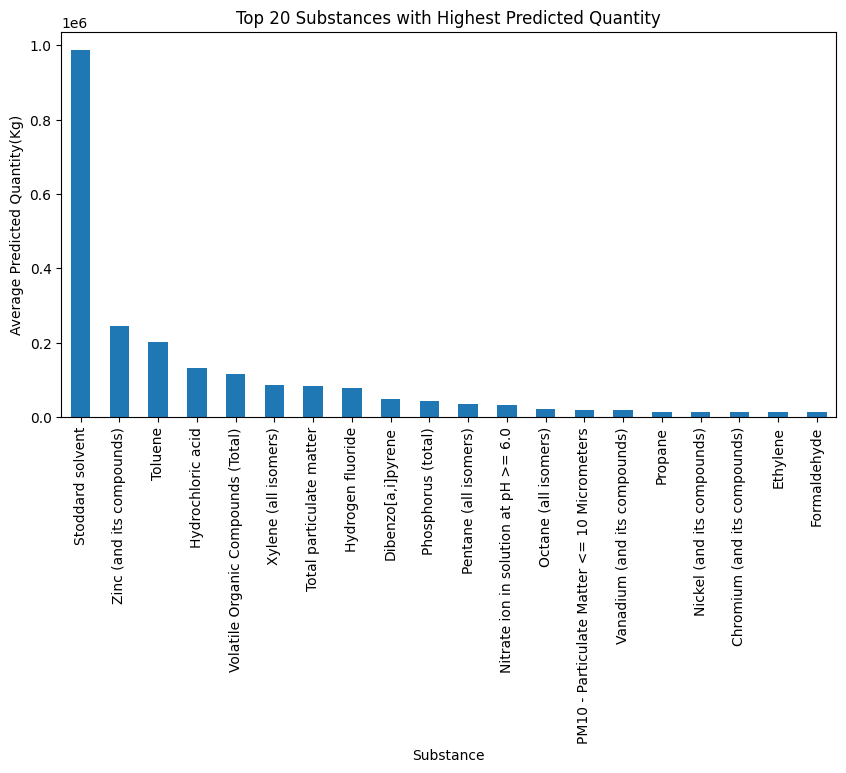

In [ ]:
import matplotlib.pyplot as plt

# Group the data by 'Substance' and calculate the average 'Predicted_Quantity'
substance_avg = X1.groupby('Substance')['Quantity'].mean().sort_values(ascending=False).head(20)

# Create a bar graph of the average predicted quantity by substance
substance_avg.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Substance')
plt.ylabel('Average Predicted Quantity(Kg)')
plt.title('Top 20 Substances with Highest Predicted Quantity')
plt.xticks(rotation=90)
plt.show()


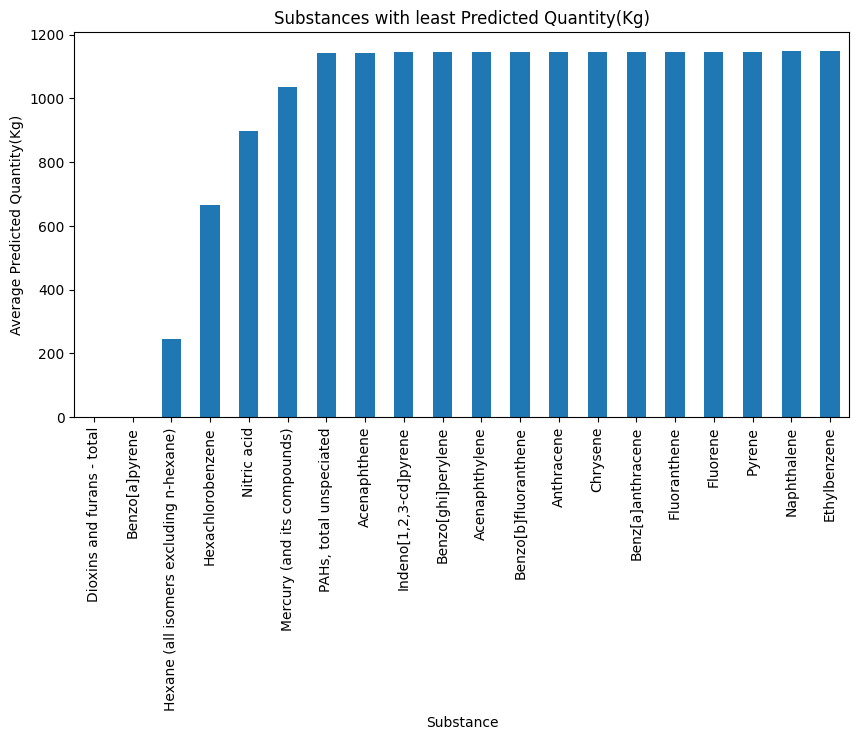

In [ ]:
# Group the data by 'Substance' and calculate the average 'Predicted_Quantity'
substance_avg = X1.groupby('Substance')['Quantity'].mean().sort_values(ascending=True).head(20)

# Create a bar graph of the average predicted quantity by substance
substance_avg.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Substance')
plt.ylabel('Average Predicted Quantity(Kg)')
plt.title('Substances with least Predicted Quantity(Kg)')
plt.xticks(rotation=90)
plt.show()


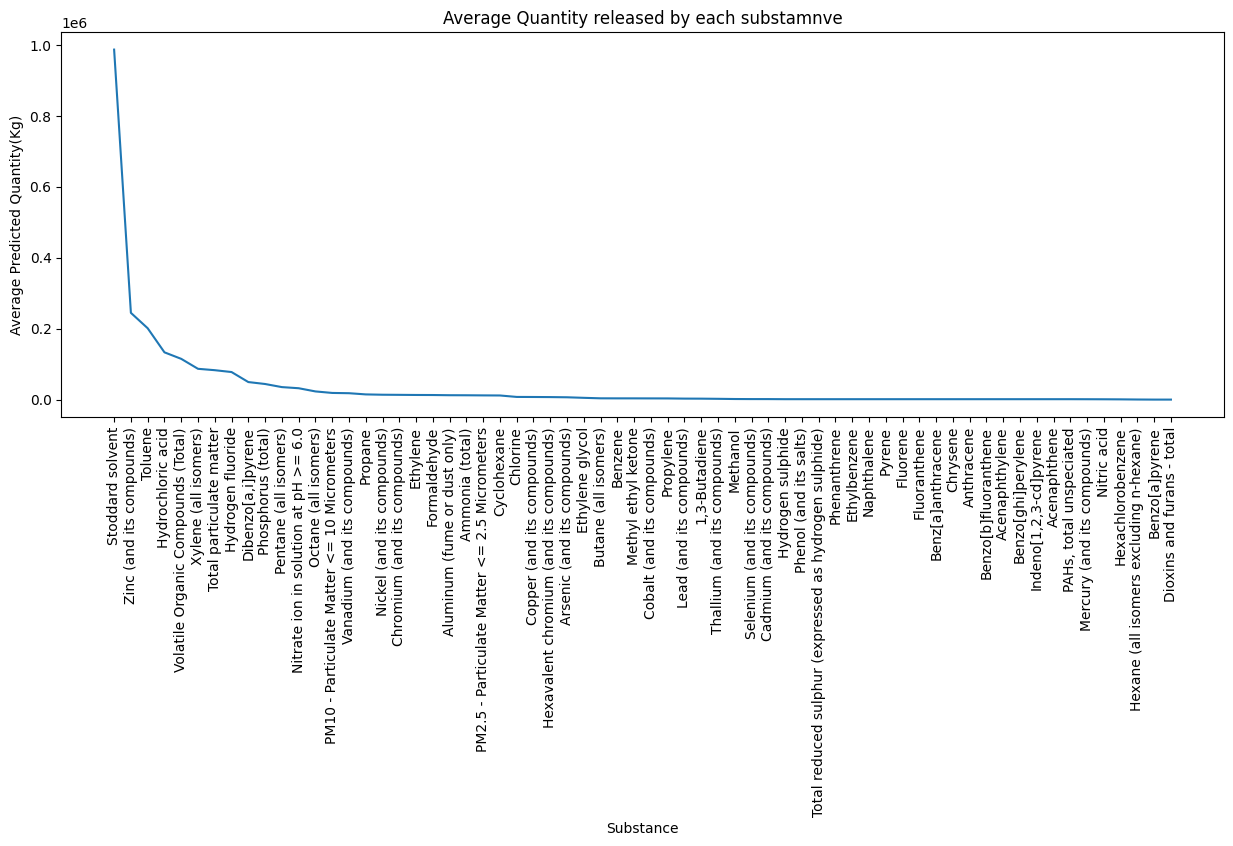

In [ ]:
# prompt: line graph shown avreage quantity released by each substamnve

import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'Substance' and calculate the average 'Predicted_Quantity'
substance_avg = X1.groupby('Substance')['Quantity'].mean().sort_values(ascending=False)

# Create a line graph of the average predicted quantity by substance
plt.figure(figsize=(15, 5))
sns.lineplot(data=substance_avg)
plt.xlabel('Substance')
plt.ylabel('Average Predicted Quantity(Kg)')
plt.title('Average Quantity released by each substance')
plt.xticks(rotation=90)
plt.show()
